Predicting Houseprice:

This project was completed has part of Kaggle competition.

In this project we will dive deep into the following areas
1. Exploratory Data Analysis
    a. Dependent variable
    b. Univariate Analysis on Independent Variables
        1. Distribution of Numerical variables:
        2. Distribution of Categorical Variables
    c. Bivariate Analysis
        1. Correlation among Numerical Variables
        3. Mean Disparity among Categorical Variables
    d. Missing Values
    e. Oulier detection
2. Feature Engineering:
    a. Impute missing values
    b. Standardization
    c. Engineer meaningful features
    d. Dealing with categorical encoding
3. Model Building
    a. Individual Models (Lasso,Ridge,LGB,XGB,RandomForest,SVM
    b. Model Stacking

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats.stats import pearsonr

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
#from sklearn.linear_model import regressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000



In [286]:
df=pd.read_csv('C:/Users/thand/Downloads/house-prices-advanced-regression-techniques/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [287]:
df1=pd.read_csv('C:/Users/thand/Downloads/house-prices-advanced-regression-techniques/train.csv')
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [288]:
#Lets have a peak at the columns
print('There are about {} columns'.format(len(df.columns)))
print(df.columns)

There are about 81 columns
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


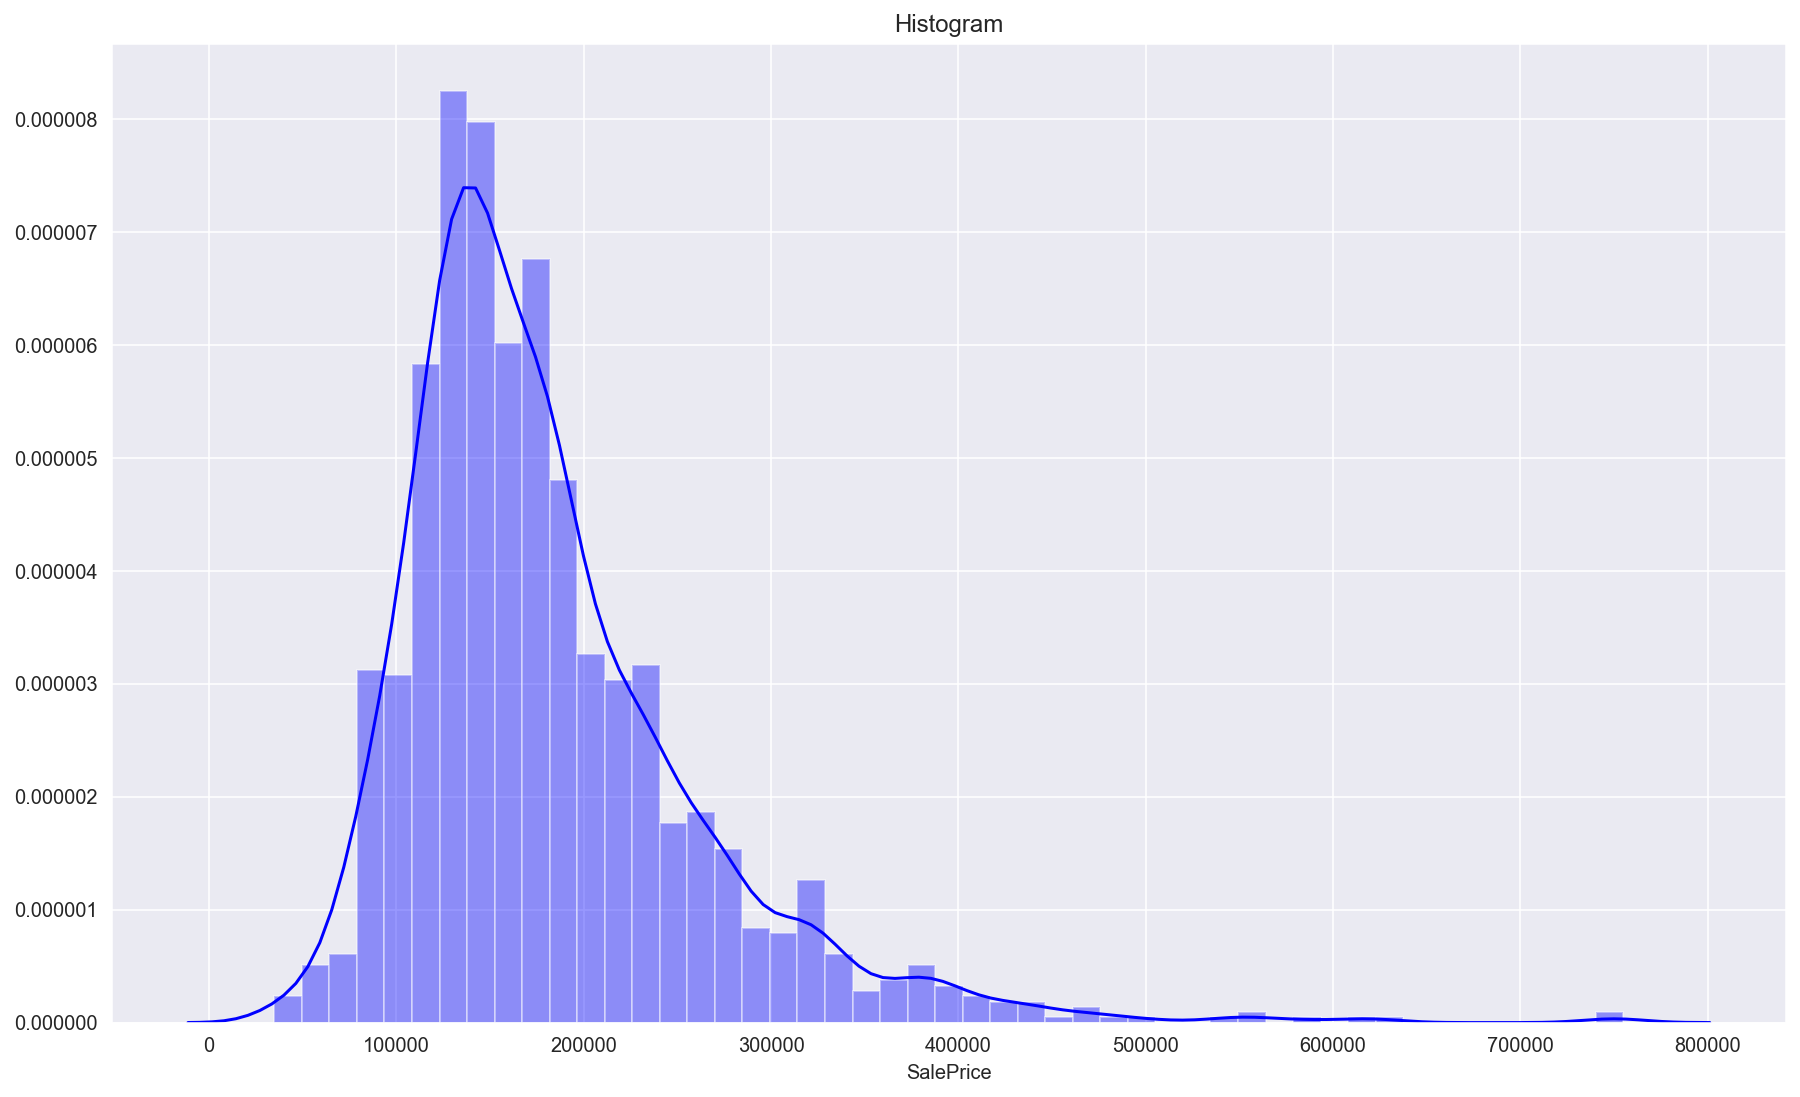

In [289]:
#Lets take a look at the dependent variable
continuousVariable(df,'SalePrice')

In [328]:
df1.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The Dependent variable, SalePrice is Left skewed, Non Normal and Leptokurtic. Needs transformations for linear regression

In [290]:
# Variables by data types

#In this section, we will make the following lists
#num_cols: list of all numerical variables
#cat_cols: list of all categorical variables
#ordinal_cols: list of all mean encoded ordinal variables


#discrete ratio/interval to categorical features to get more info on them
numericToCategory(df,['MoSold','YrSold','TotRmsAbvGrd','OverallQual','OverallCond','YearBuilt','BsmtFullBath','BsmtHalfBath','YearRemodAdd','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','GarageCars'])
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols= df.select_dtypes(include=numerics).columns   #list of all numerical cols
cat_cols= df.select_dtypes(exclude=numerics).columns
#Nominal/ordinal



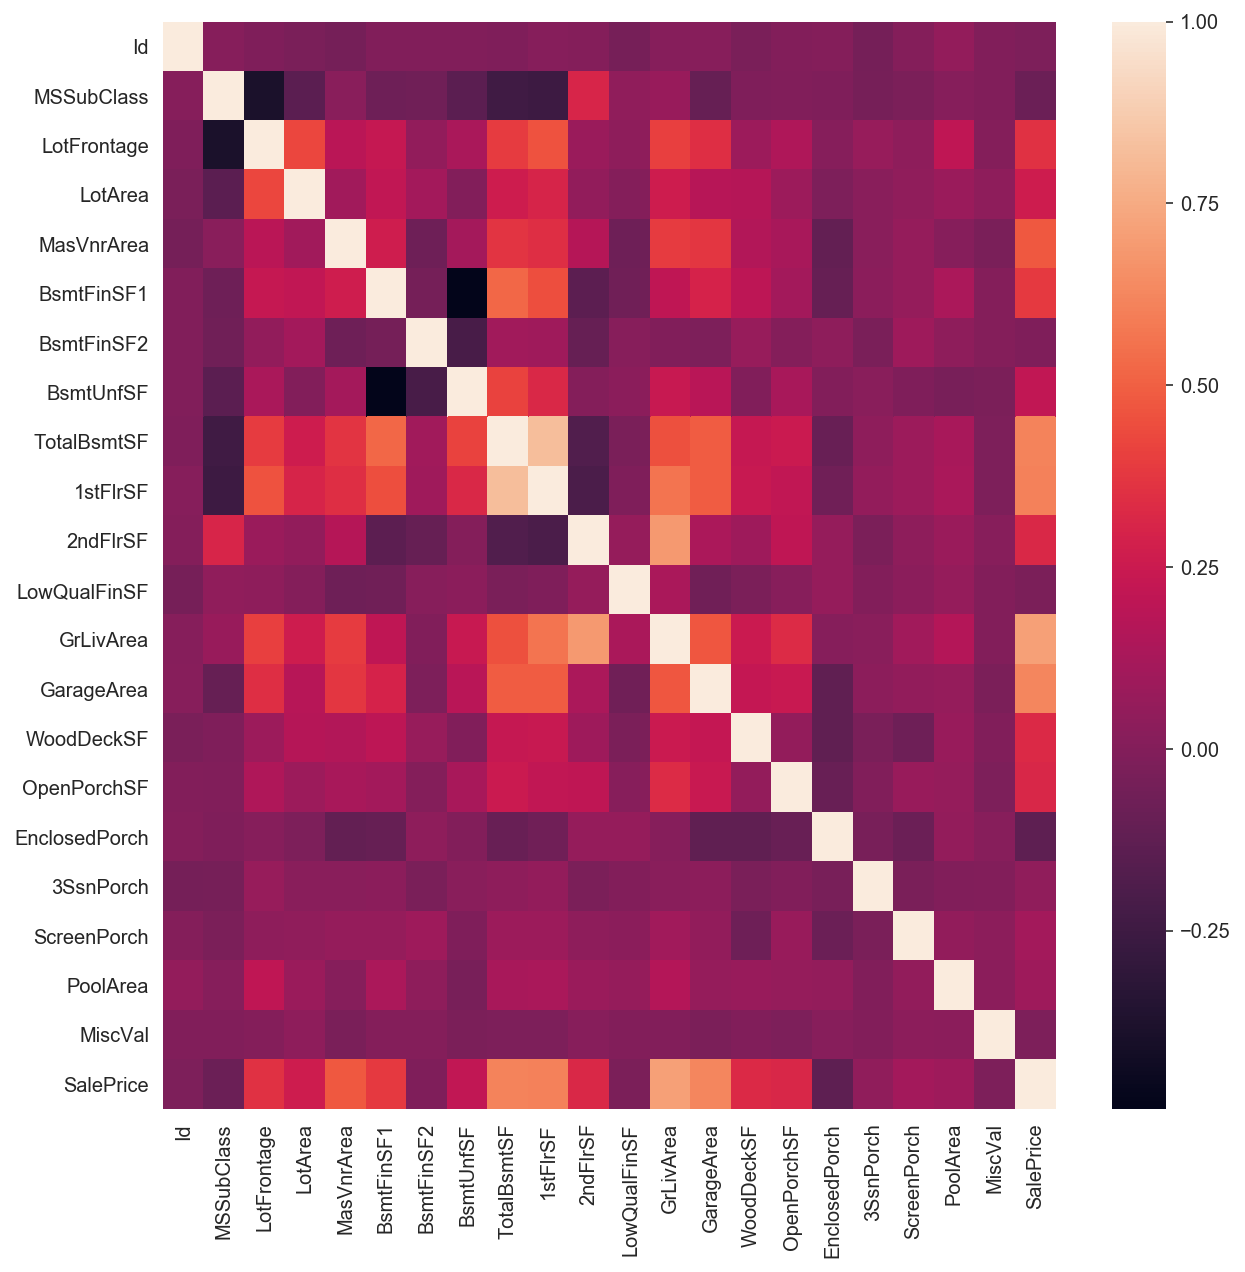

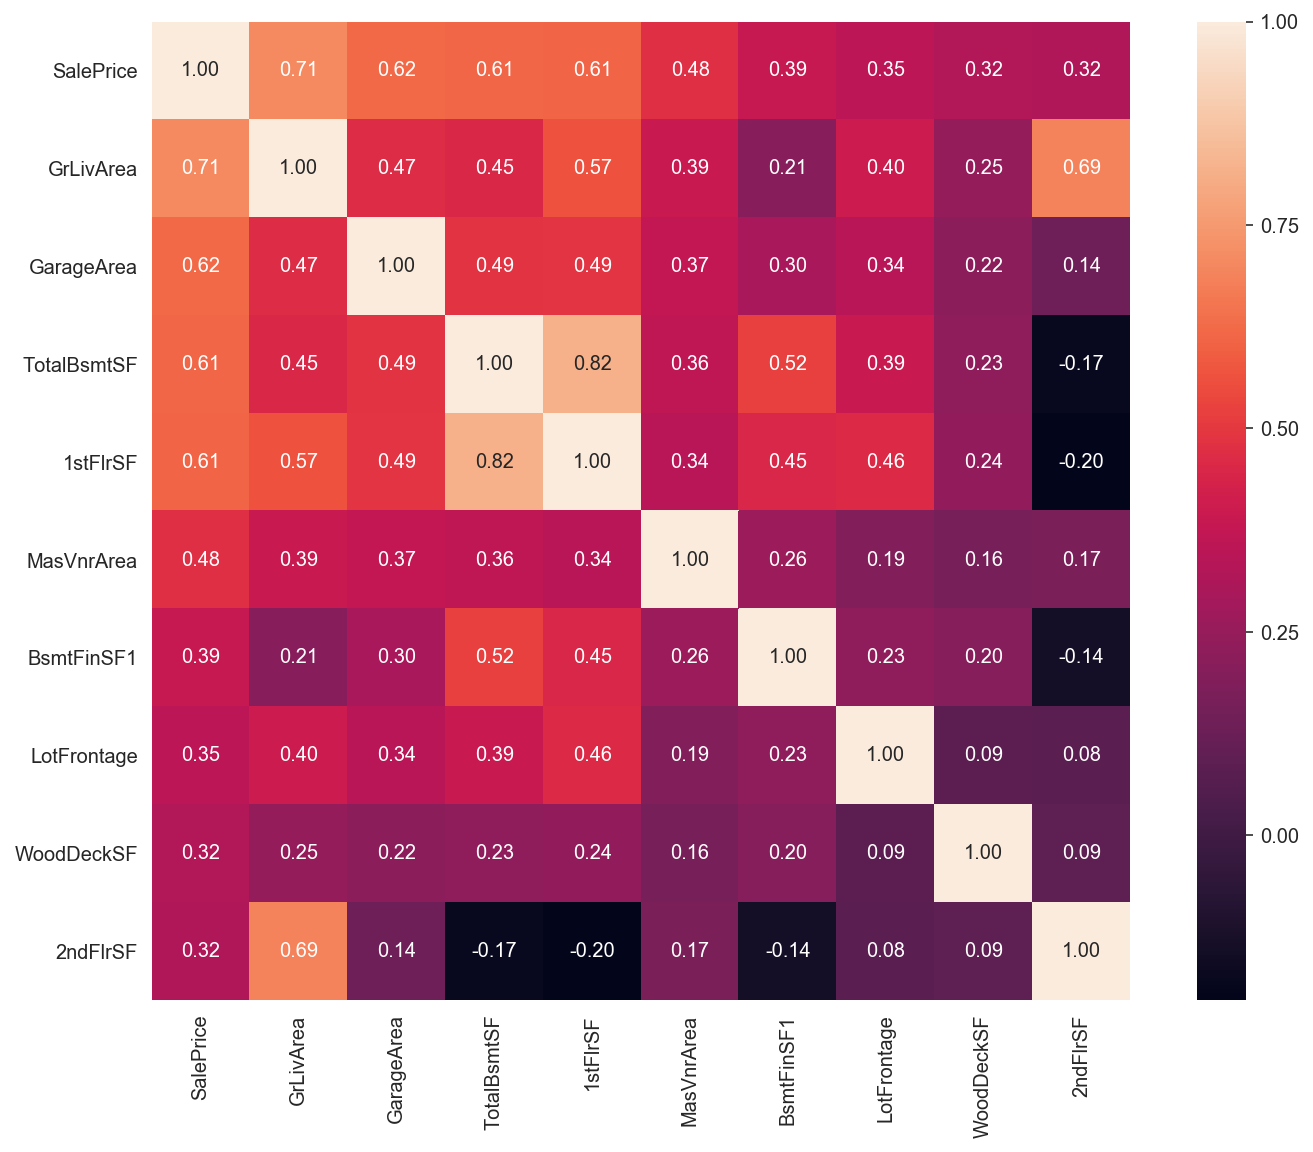

In [291]:
# Lets look at highly correlated Numerical variables

NumericalEDA('Heatmap',18,2,df,df.select_dtypes(include=numerics).columns,'SalePrice')

Top 5 highly correlated variables with SalePrice : GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, MasVnrArea

There are Many correlated independent variables as well
'GrLivArea'--> 2ndFlrSF,1ndFlrSF
'TotalBsmtSF'-->BsmtFinSF1, 1stFlrSF

Processing is need while modelling Linear regression


<Figure size 1440x4320 with 0 Axes>

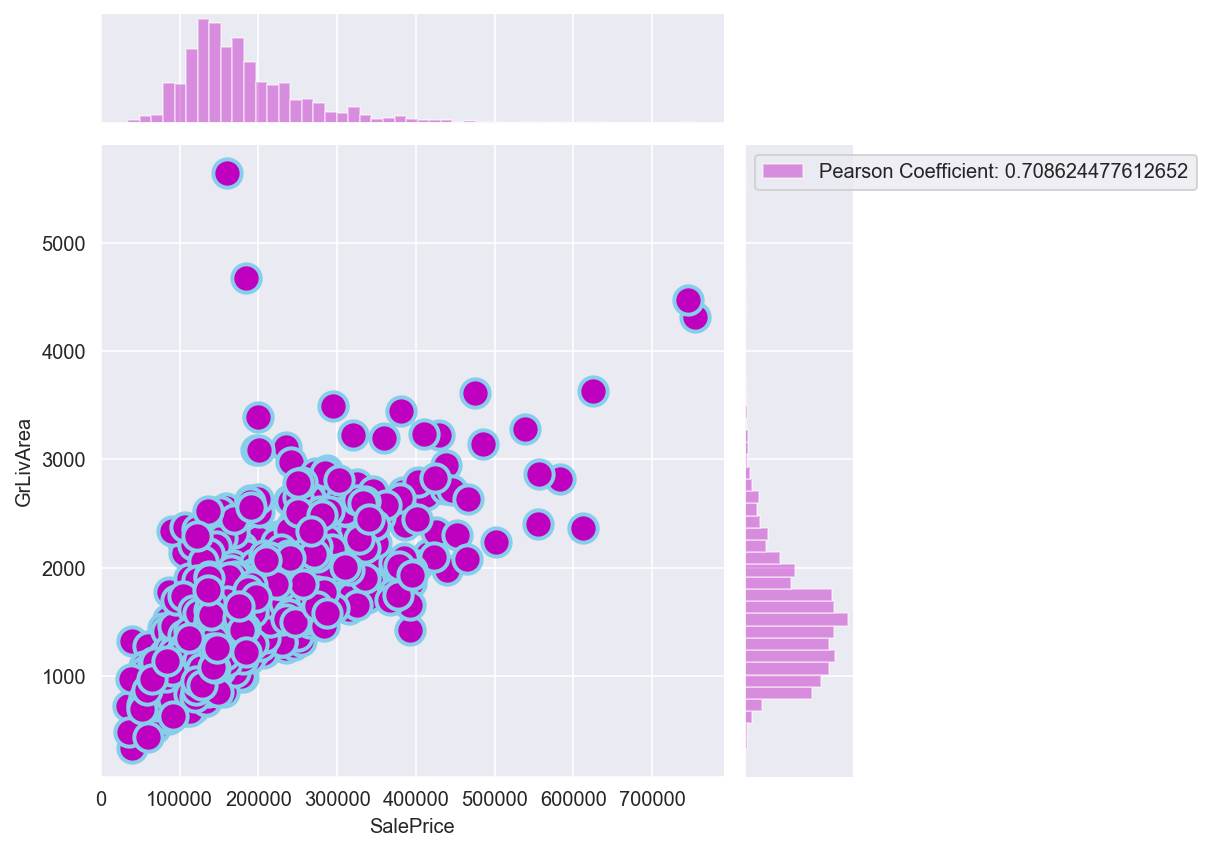

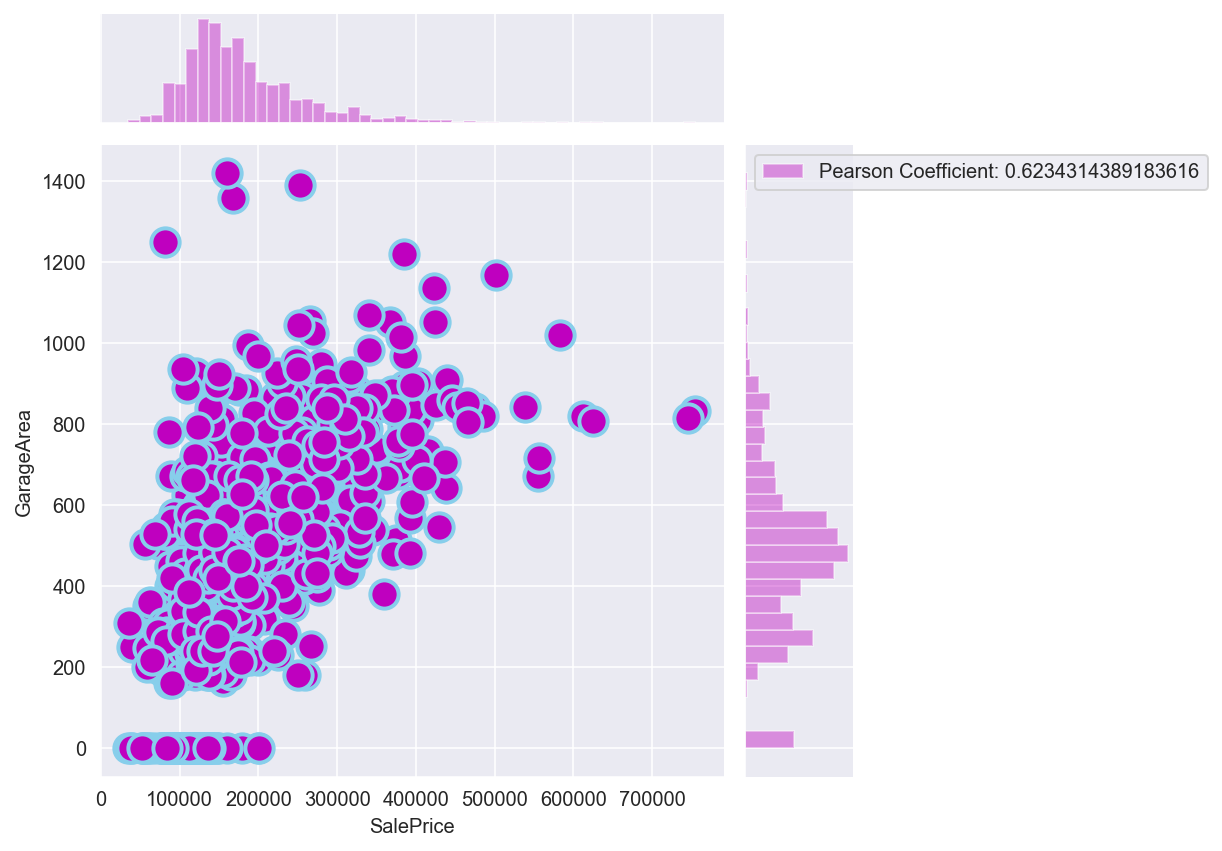

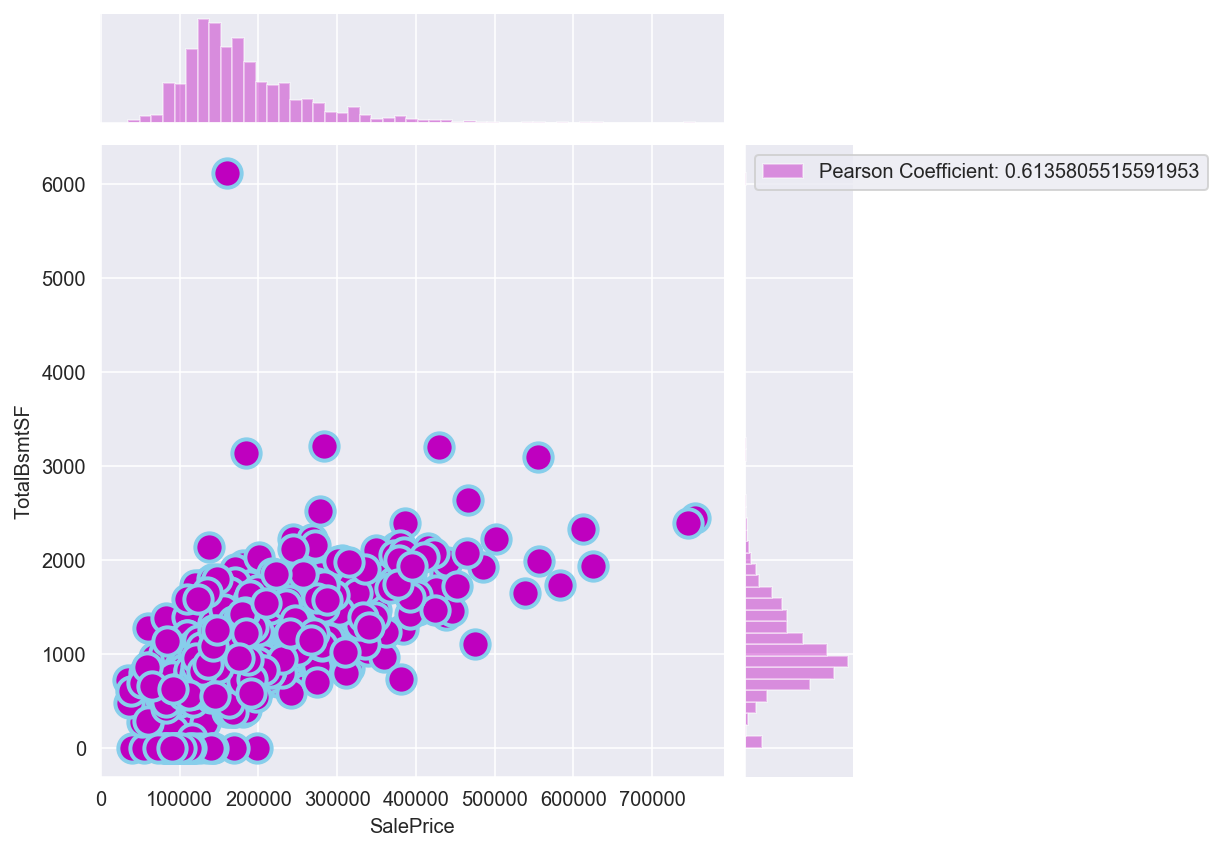

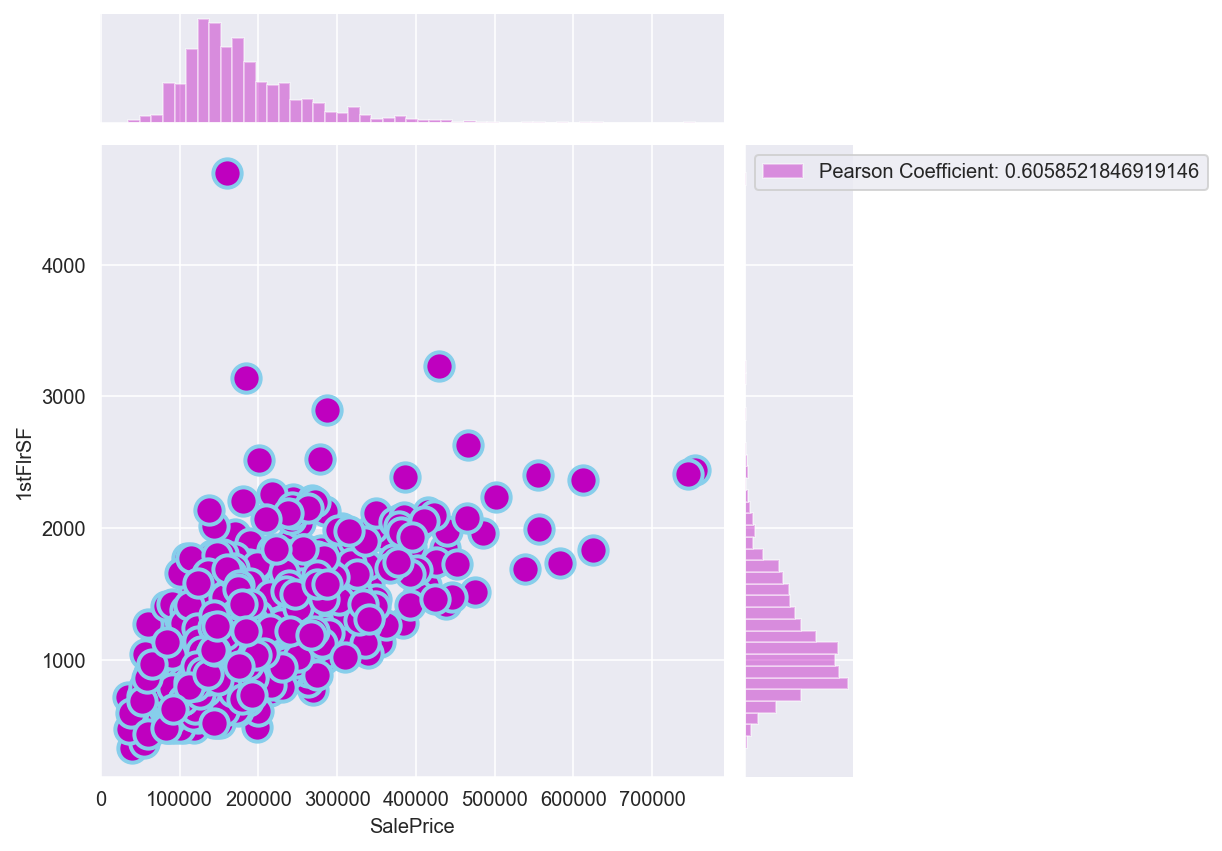

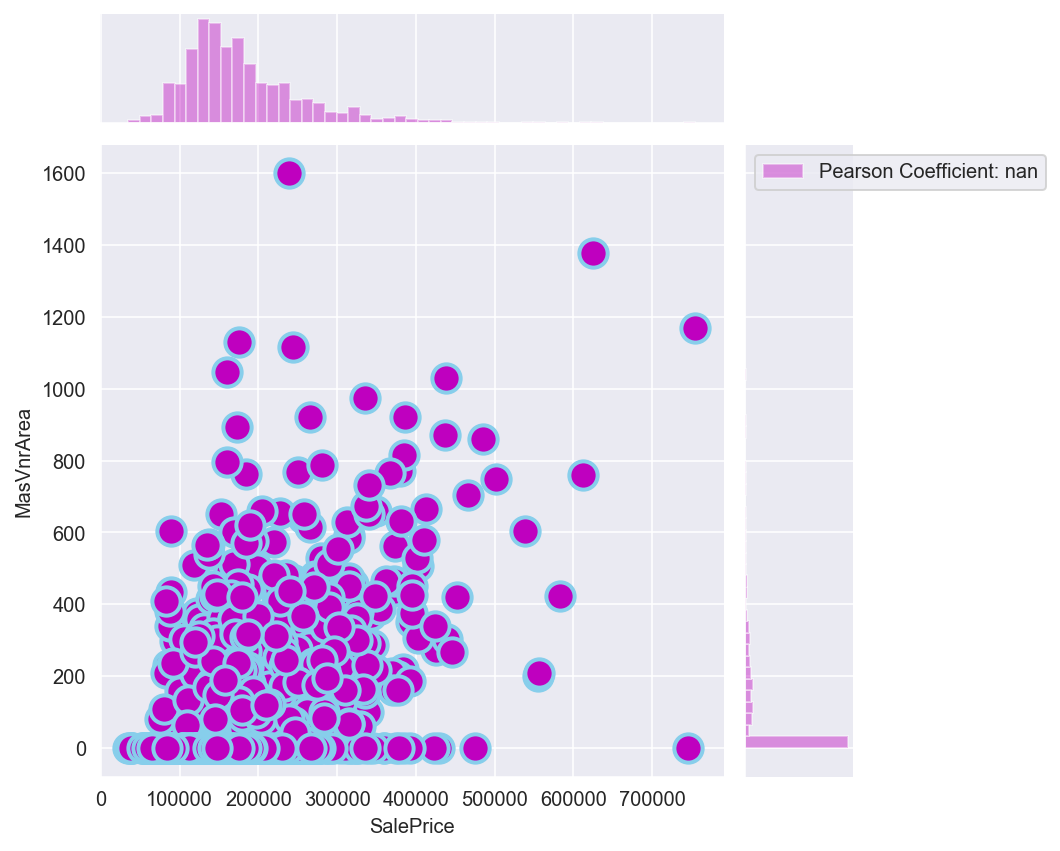

In [292]:
# Pair plot on the top 5 correlated variables with SalePrice
NumericalEDA('pair plot',5,1,df,['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea'],'SalePrice')


Looking at the scatterplot of the top 5 correlated numerical variables, we observe the following
1. There are prominent outliers in the data
We need to process these before modelling linear regression

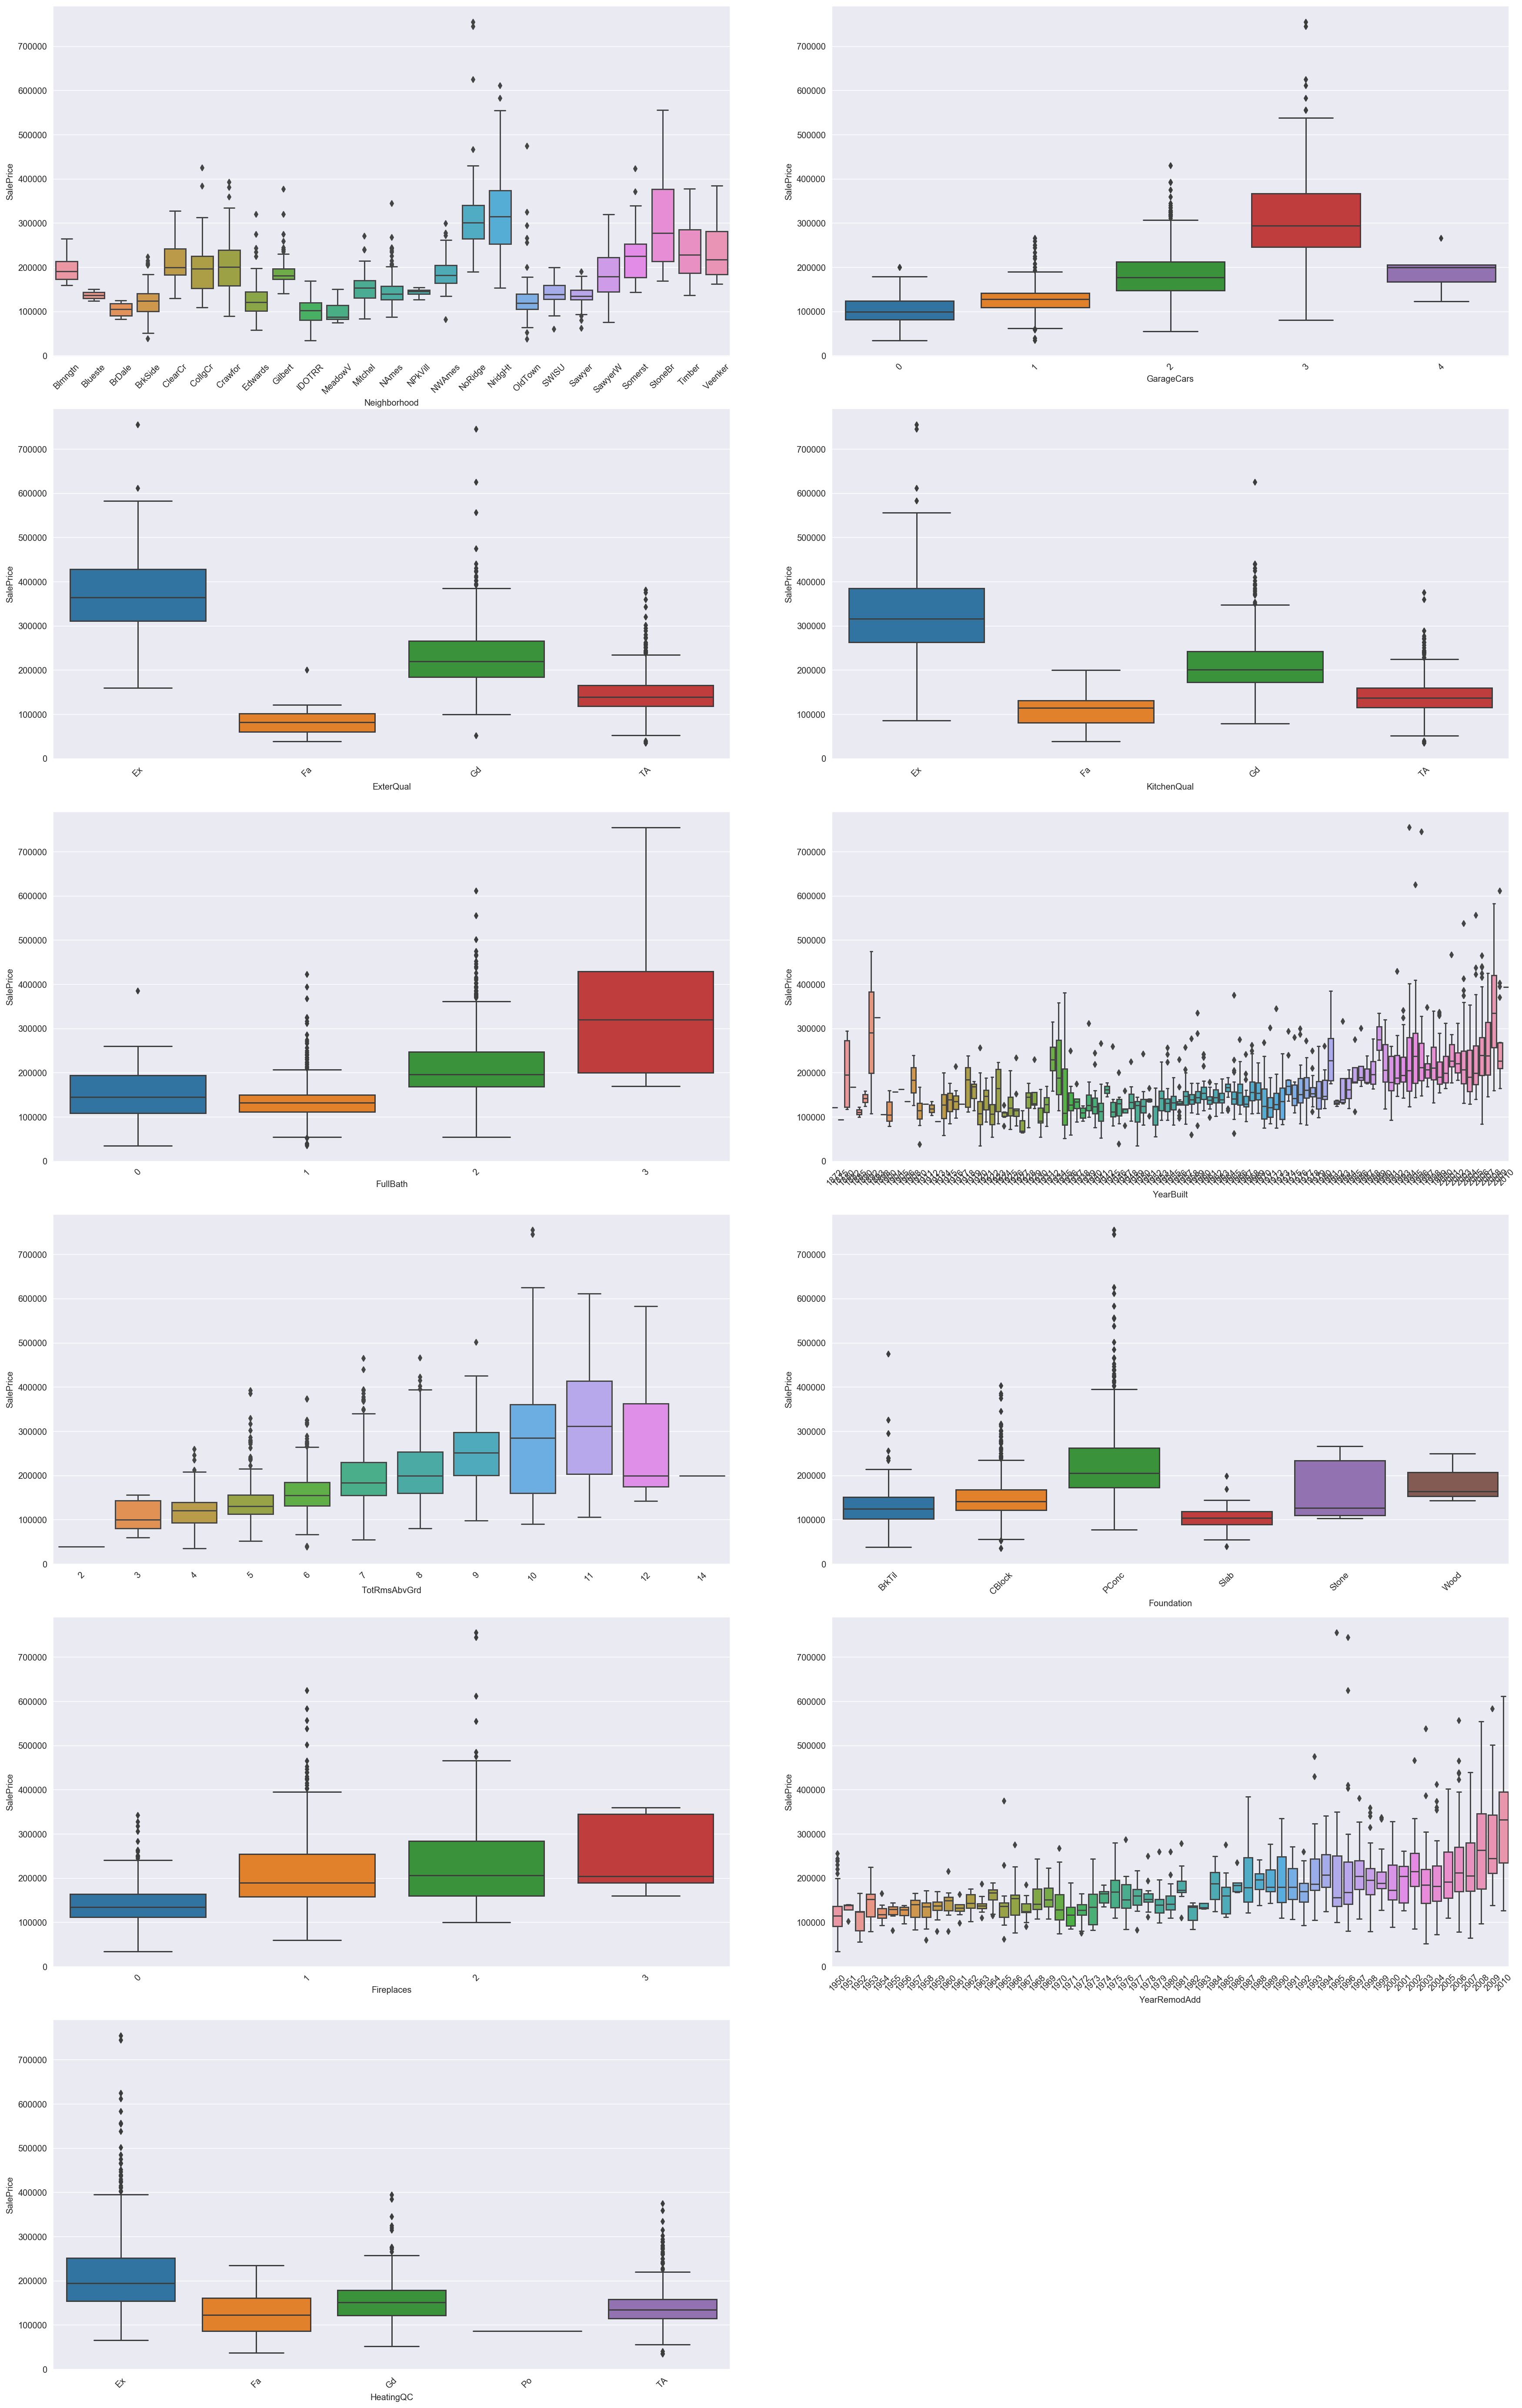

In [293]:
cat_=['OverallQual', 'Neighborhood', 'GarageCars', 'ExterQual', 'KitchenQual', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'Foundation', 'Fireplaces', 'YearRemodAdd', 'HeatingQC']
categoricalEDA(viz_type='boxplot',data=df,label='SalePrice',column=cat_,rows=6,cols=2)

Houses with the below qualities are significantly priced higher
1. Excellent and Good External Quality
2. Excellent Kitchen Quality
3. 2 or more fullbaths
4. 10+ Rooms
5. Concrete Foundations
6. Excellent heating quality 
7. Avaialability of Fireplace
8. Recently remodelled houses

In [ ]:
# Feature Engineering:



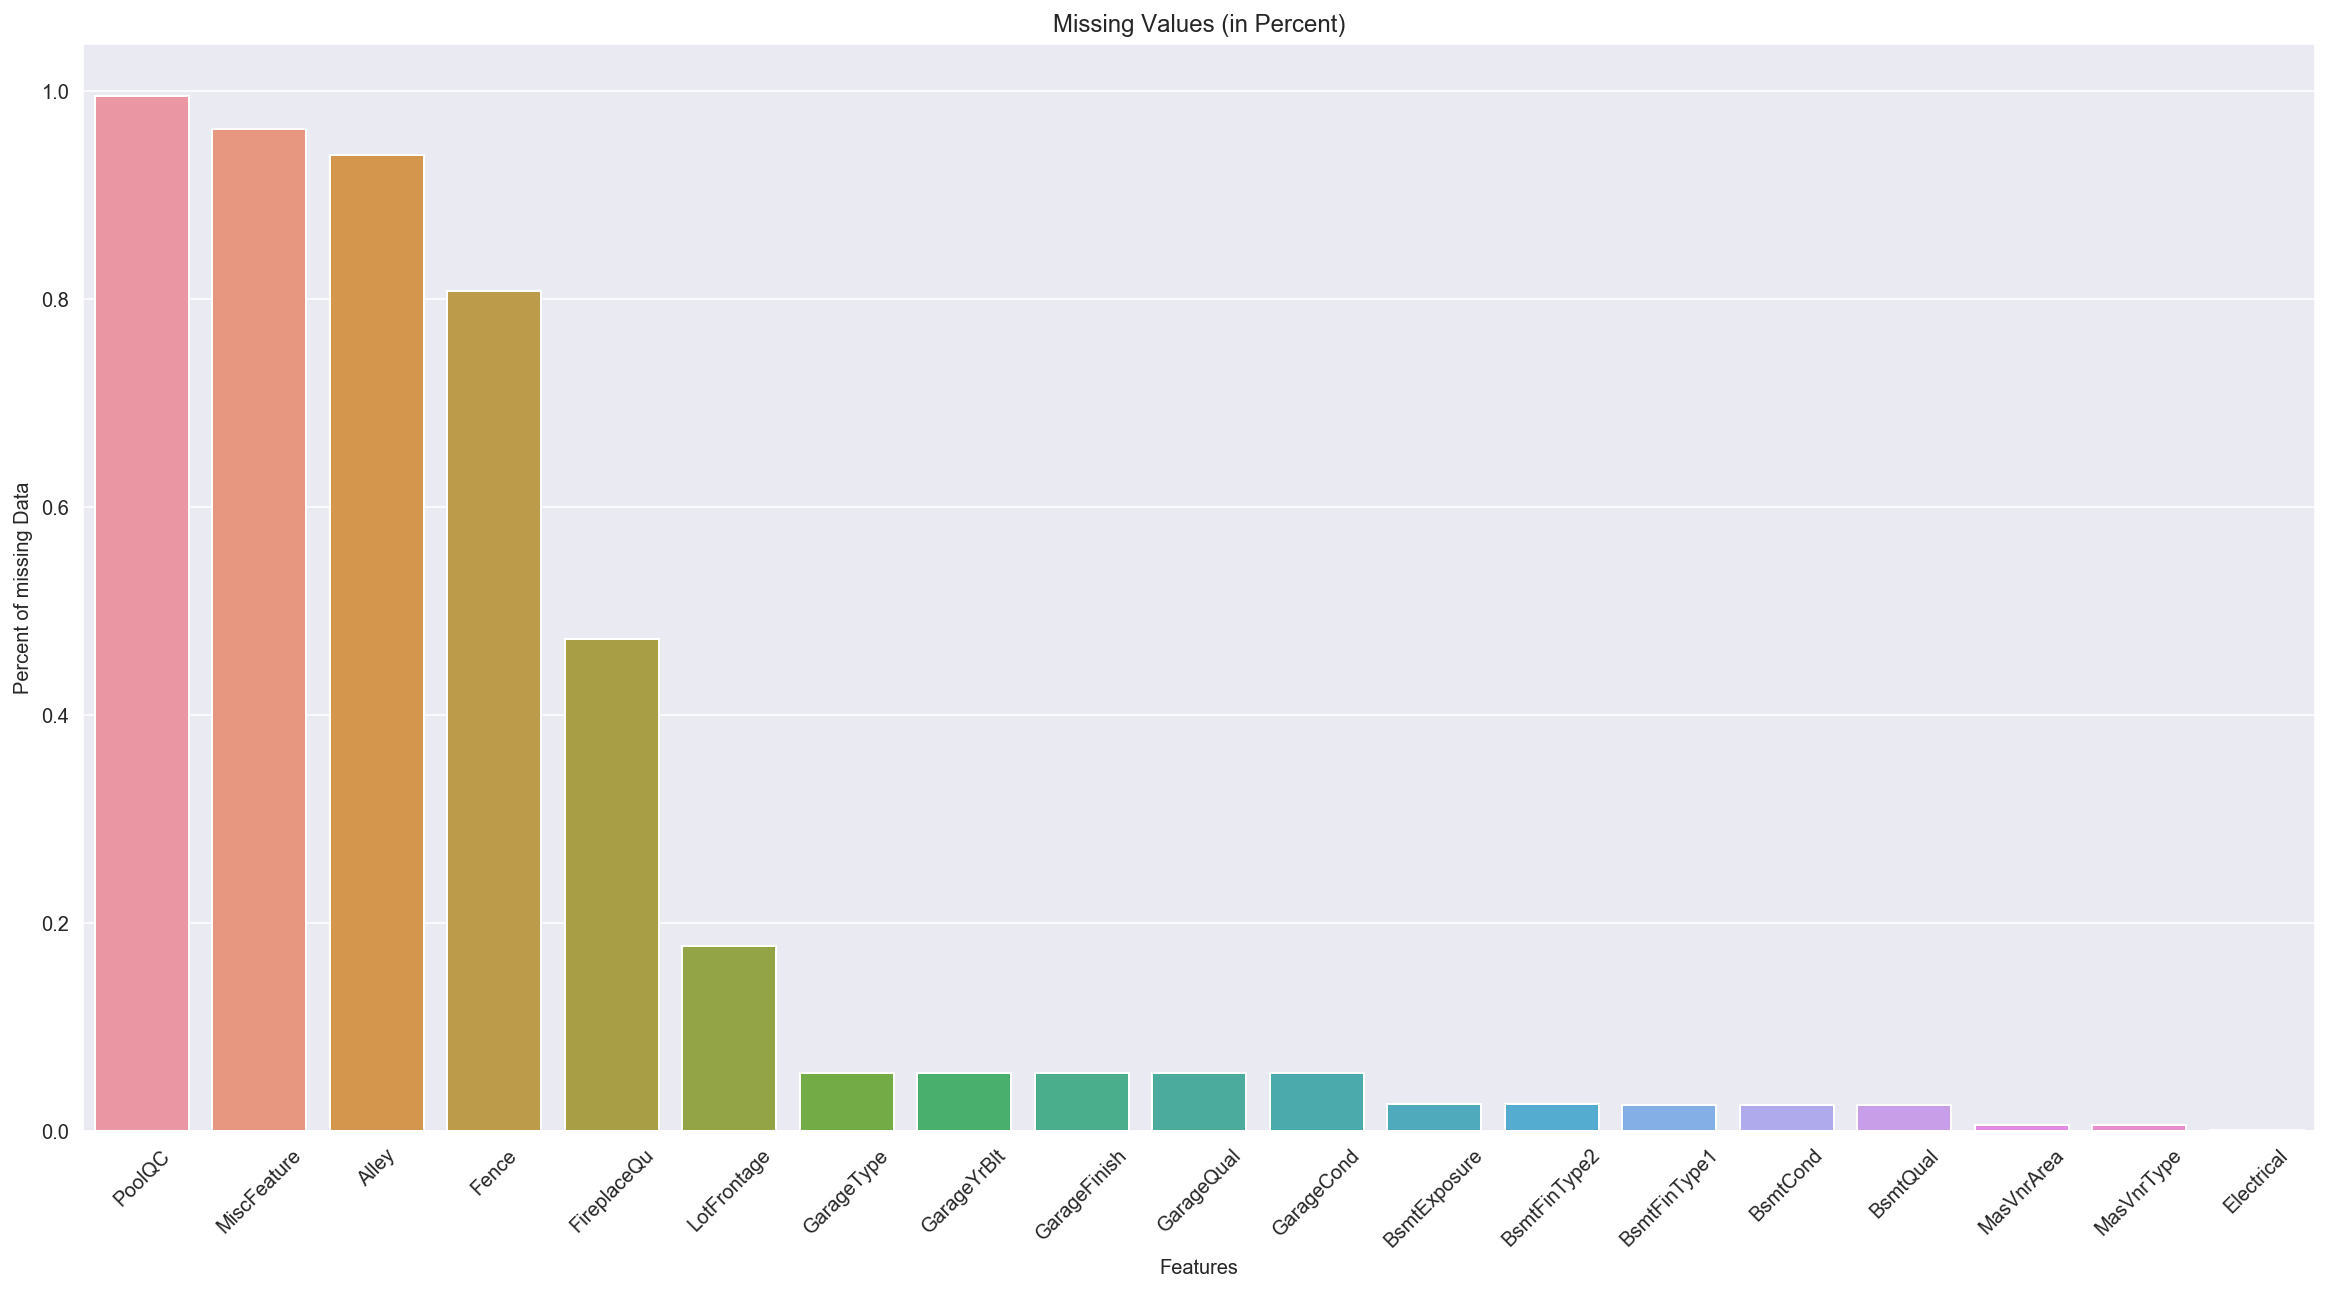

In [294]:
#Missing Values
missing_values(df)

Teating Missing Values: 
1. PoolQc: Missing PoolQc might suggest that there was no Pool in first Place. Lets fill na's with Missing
2. MiscFeature: we will drop the variable as there is>95% missing
3. Alley: 'Missing' will make more sense
4. Fence: 'Missing' will make more sense
5. FireplaceQu:-1 will make more sense
6. GarageYrBlt, lets fill with the most common Year
7. For other variables lets fill Na's with Missing

In [295]:
# Treating Missing Values
#Ordinal 
missingValueImputation(data=df,categorical_cols=['PoolQC','GarageType','Alley','Fence','FireplaceQu','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtCond','BsmtFinType1','BsmtQual','MasVnrType','Electrical'],categorical_method='value_fill',categorical_value='Missing')
missingValueImputation(data=df,categorical_cols=['GarageYrBlt'],categorical_method='popular_imputation')
df.drop(columns='MiscFeature',inplace=True)
df.drop(columns='LotFrontage',inplace=True)


In [296]:

for col in ['MoSold','YrSold','TotRmsAbvGrd','OverallQual','OverallCond','YearBuilt','BsmtFullBath','BsmtHalfBath','YearRemodAdd','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','GarageCars']:
    df[col]=df[col].astype(int)





In [297]:
#get dummies
dummy = pd.get_dummies(df[df.select_dtypes(exclude=numerics).columns])
df=df.merge(dummy,left_index=True,right_index=True)
df.head()


Id  MSSubClass MSZoning  LotArea Street    Alley LotShape LandContour  \
0   1          60       RL     8450   Pave  Missing      Reg         Lvl   
1   2          20       RL     9600   Pave  Missing      Reg         Lvl   
2   3          60       RL    11250   Pave  Missing      IR1         Lvl   
3   4          70       RL     9550   Pave  Missing      IR1         Lvl   
4   5          60       RL    14260   Pave  Missing      IR1         Lvl   

  Utilities LotConfig  ... SaleType_ConLw SaleType_New SaleType_Oth  \
0    AllPub    Inside  ...              0            0            0   
1    AllPub       FR2  ...              0            0            0   
2    AllPub    Inside  ...              0            0            0   
3    AllPub    Corner  ...              0            0            0   
4    AllPub       FR2  ...              0            0            0   

  SaleType_WD SaleCondition_Abnorml SaleCondition_AdjLand  \
0           1                     0                     0   
1           1                     0                     0   
2           1                     0                     0   
3           1                     1                     0   
4           1                     0                     0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 342 columns]

In [298]:
df=df.drop('MasVnrArea',1)

In [299]:
from sklearn.model_selection import train_test_split
from sklearn import metrics



x,y=df[df.columns.difference(cat_cols)].drop(['SalePrice','Id'], axis=1), df.SalePrice
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [300]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')

Coefficients: [-1.57245888e+08 -1.57245875e+08  3.10209350e+01 -1.43006989e+12
 -1.43006990e+12 -1.43006988e+12 -3.32430335e+11 -3.32430332e+11
 -3.32430355e+11 -3.32430350e+11 -3.32430351e+11  1.53649893e+11
  1.53649896e+11  1.61417310e+11 -1.17308585e+12  1.53649896e+11
  1.99709318e+12  1.99709320e+12  1.99709317e+12  1.99709318e+12
  1.99709317e+12 -6.64189363e+10 -6.64189363e+10  4.51051740e+08
  4.51052311e+08  4.51060152e+08  4.51044725e+08 -3.08835574e+09
  4.51053033e+08  4.51057106e+08 -1.44207193e+08 -1.44229320e+08
 -1.44207753e+08 -1.44228153e+08 -1.44237980e+08 -1.44219732e+08
 -1.44231397e+08  7.26013258e+08  7.25993345e+08  7.25999184e+08
 -3.50198519e+09  7.25999627e+08 -6.64189363e+10  3.53169642e+08
  3.53176710e+08 -3.62599459e+07 -3.62563090e+07 -3.62422167e+07
 -3.62455985e+07 -3.62456885e+07 -3.62688845e+07 -3.62418663e+07
 -3.62614027e+07 -3.62417038e+07 -2.12324260e+07 -2.12335996e+07
 -2.12350699e+07 -2.12157273e+07 -2.14558909e+07 -1.14752744e+08
 -1.1349367

In [301]:

import statsmodels.api as sm

X_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     45.34
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:29:33   Log-Likelihood:                -11612.
No. Observations:                1022   AIC:                         2.367e+04
Df Residuals:                     797   BIC:                         2.478e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.519e+04   9811.746     -1.548      0.122   -3.44e+04    4070.453
1stFlrSF                  9.3523      8.650      1.081      0.280      -7.628      26.332
2ndFlrSF                 21.7156      7.694      2.822      0.005       6.612      36.819
3SsnPorch                31.0311     27.536      1.127      0.260     -23.021      85.084
Alley_Grvl            -4930.0189   5238.343     -0.941      0.347   -1.52e+04    5352.560
Alley_Missing         -1.088e+04   4283.766     -2.540      0.011   -1.93e+04   -2470.069
Alley_Pave              619.4211   5485.407      0.113      0.910   -1.01e+04    1.14e+04
BldgType_1Fam          6709.1743   1.27e+04      0.529      0.597   -1.82e+04    3.16e+04
BldgType_2fmCon        9612.6517    1.2e+04      0.801      0.424    -1.4e+04    3.32e+04
BldgType_Duplex       -1.362e+04   7019.401     -1.940      0.053   -2.74e+04     158.547
BldgType_Twnhs        -8737.6388   7051.056     -1.239      0.216   -2.26e+04    5103.196
BldgType_TwnhsE       -9153.4993   5693.344     -1.608      0.108   -2.03e+04    2022.221
BsmtCond_Fa           -8721.9006   6891.521     -1.266      0.206   -2.22e+04    4805.775
BsmtCond_Gd           -5032.3261   6635.057     -0.758      0.448   -1.81e+04    7991.926
BsmtCond_Missing       2003.9817   1.08e+04      0.186      0.853   -1.92e+04    2.32e+04
BsmtCond_Po            2226.3819   1.55e+04      0.144      0.886   -2.81e+04    3.26e+04
BsmtCond_TA           -5665.6000   6222.249     -0.911      0.363   -1.79e+04    6548.331
BsmtExposure_Av       -2499.7052   5590.939     -0.447      0.655   -1.35e+04    8475.001
BsmtExposure_Gd         1.85e+04   5841.517      3.166      0.002    7028.571       3e+04
BsmtExposure_Missing  -1.511e+04   1.93e+04     -0.784      0.433   -5.29e+04    2.27e+04
BsmtExposure_Mn       -6426.1948   5819.350     -1.104      0.270   -1.78e+04    4996.869
BsmtExposure_No       -9644.1367   5397.382     -1.787      0.074   -2.02e+04     950.626
BsmtFinSF1               18.7123      3.585      5.220      0.000      11.675      25.749
BsmtFinSF2               -5.0510      7.857     -0.643      0.520     -20.474      10.372
BsmtFinType1_ALQ      -4302.8444   3171.264     -1.357      0.175   -1.05e+04    1922.172
BsmtFinType1_BLQ      -3731.7280   3416.923     -1.092      0.275   -1.04e+04    2975.504
BsmtFinType1_GLQ       4108.2670   3150.373      1.304      0.193   -2075.742    1.03e+04
BsmtFinType1_LwQ      -1.132e+04   4593.509     -2.464      0.014   -2.03e+04   -2303.309
BsmtFinType1_Missing   2003.9817   1.08e+04      0.186      0.853   -1.92e+04    2.32e+04
BsmtFinType1_Rec      -3010.4953   3513.018     -0.857      0.392   -9906.357    3885.366
BsmtFinType1_Unf       1063.4688   3298.430      0.322      0.747   -5411.168    7538.106
BsmtFinType2_ALQ       

Jarque-Bera test ---- statistic: 8808.8849, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8605, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.4919, p-value: 0.0000
Anderson-Darling test ---- statistic: 20.7840, 5% critical value: 0.7840
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


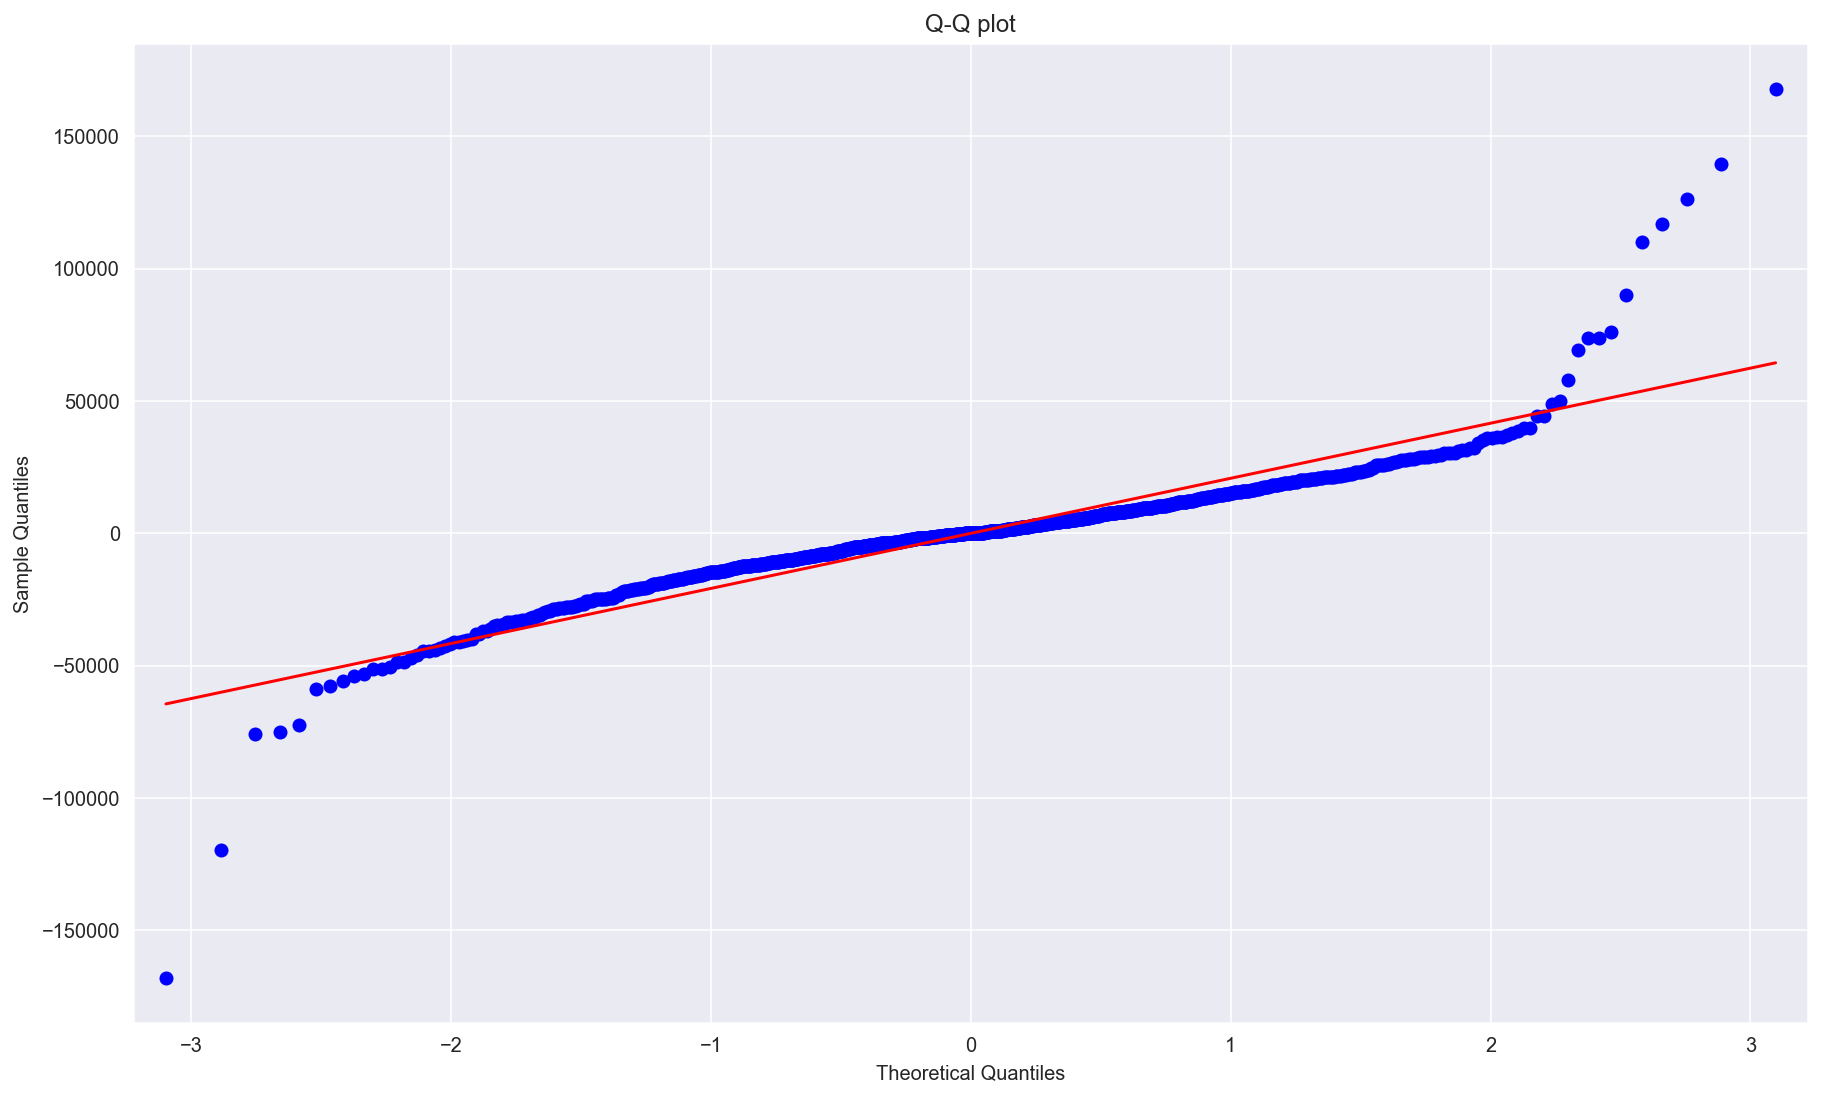

In [302]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

Underlying data is not normal

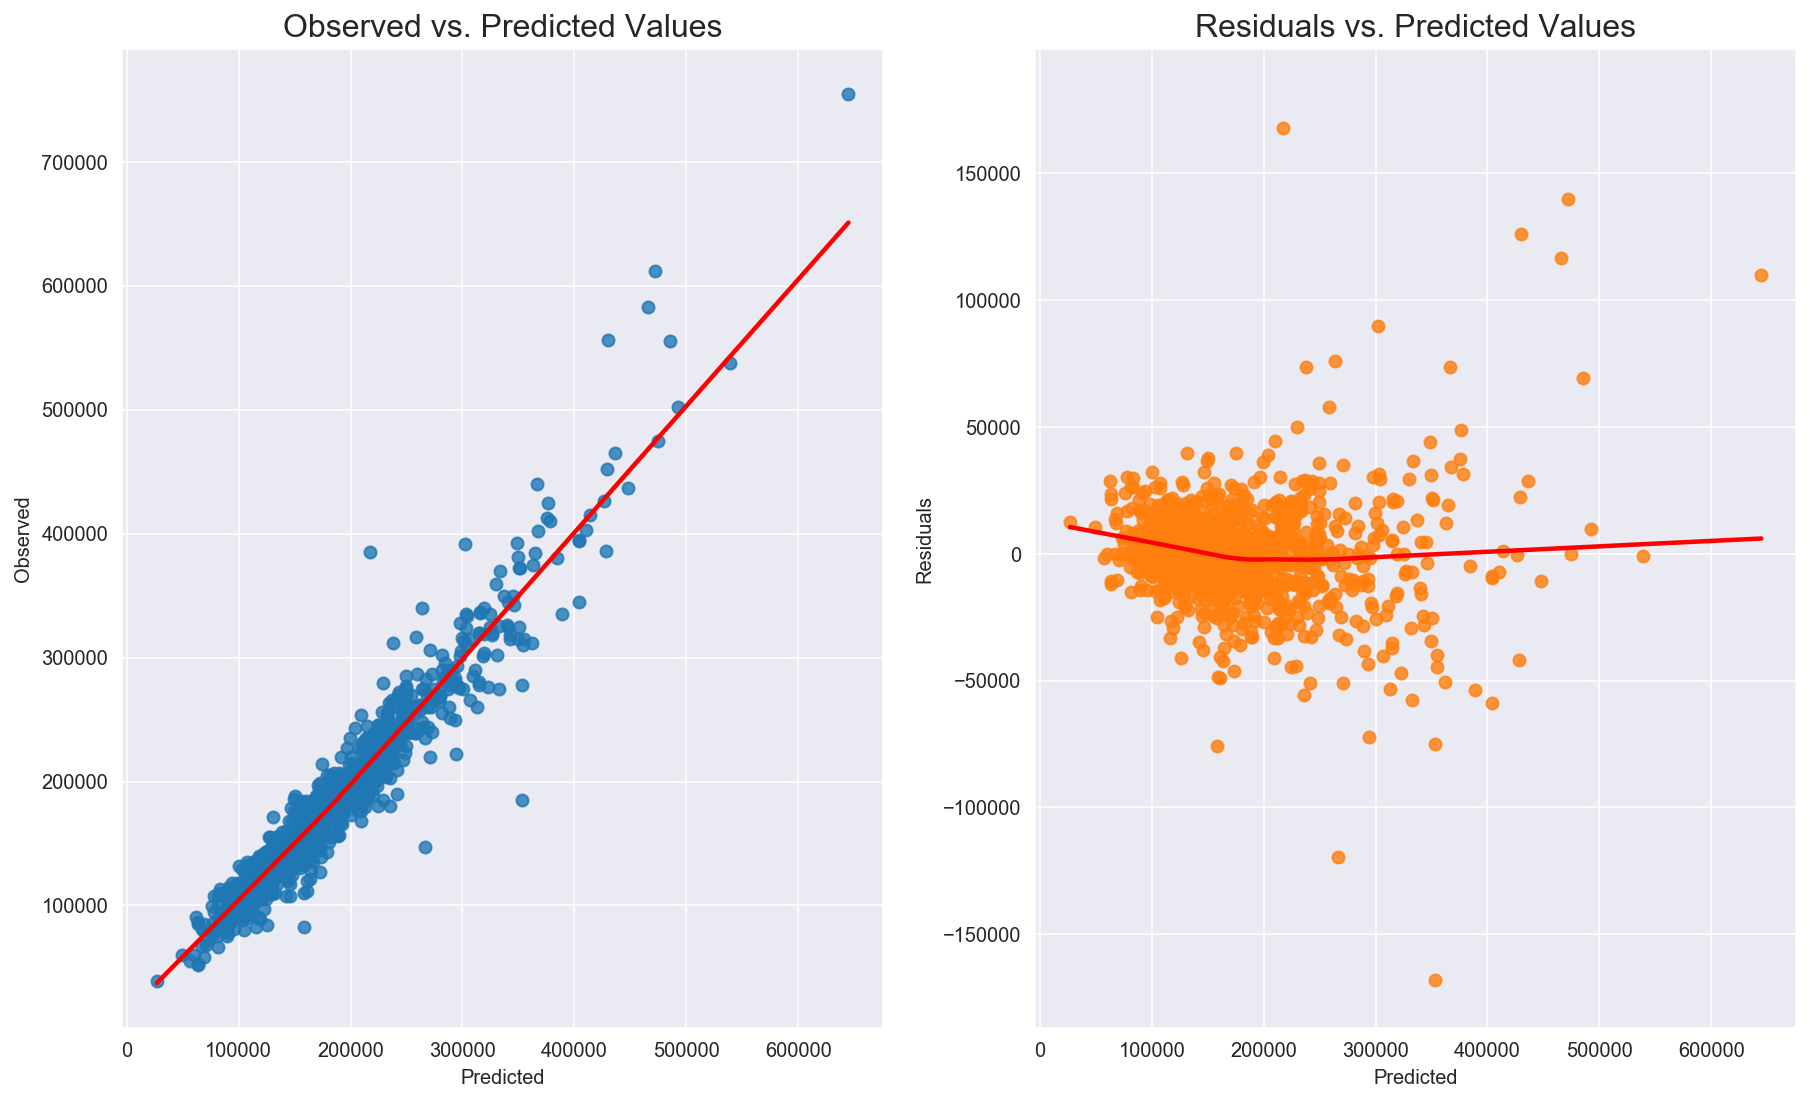

In [303]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y_train)    

https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
Linearity Assumption:
The inspection of the plots shows that the linearity assumption is not satisfied.

Potential solutions:
1. non-linear transformations to dependent/independent variables
2. adding extra features which are a transformation of the already used ones (for example squared version)
3. adding features that were not considered before

#From the heatmap it is evident that there is high degree of multicolinearity in the model


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  6.716918e+02
p-value                        5.205083e-34
f-value                        6.822289e+00
f p-value                      1.417749e-91

 Goldfeld-Quandt test ----
                value
F statistic  0.701885
p-value      0.998977

 Residuals plots ----


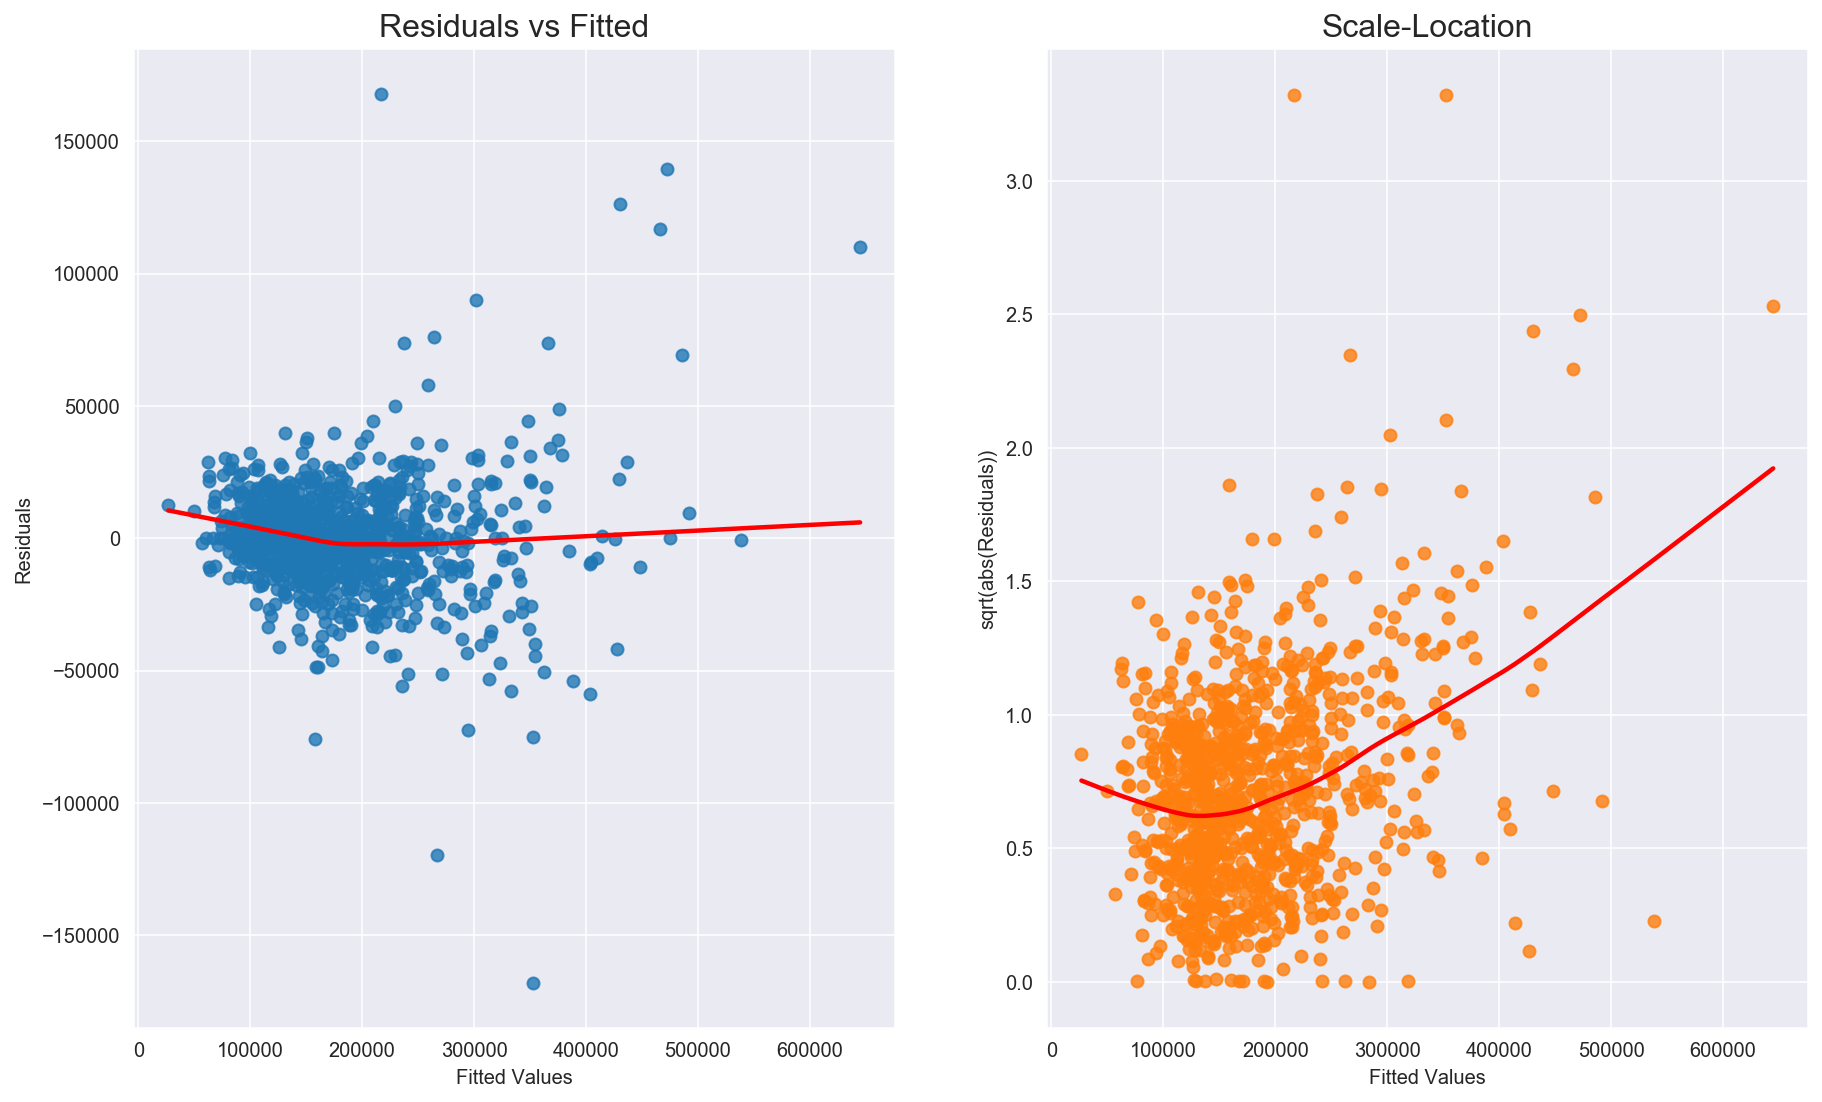

In [304]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

The results indicate that the assumption is not satisfied and we should reject the hypothesis of homoscedasticity.
Potential solutions:
log transformation of the dependent variable

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


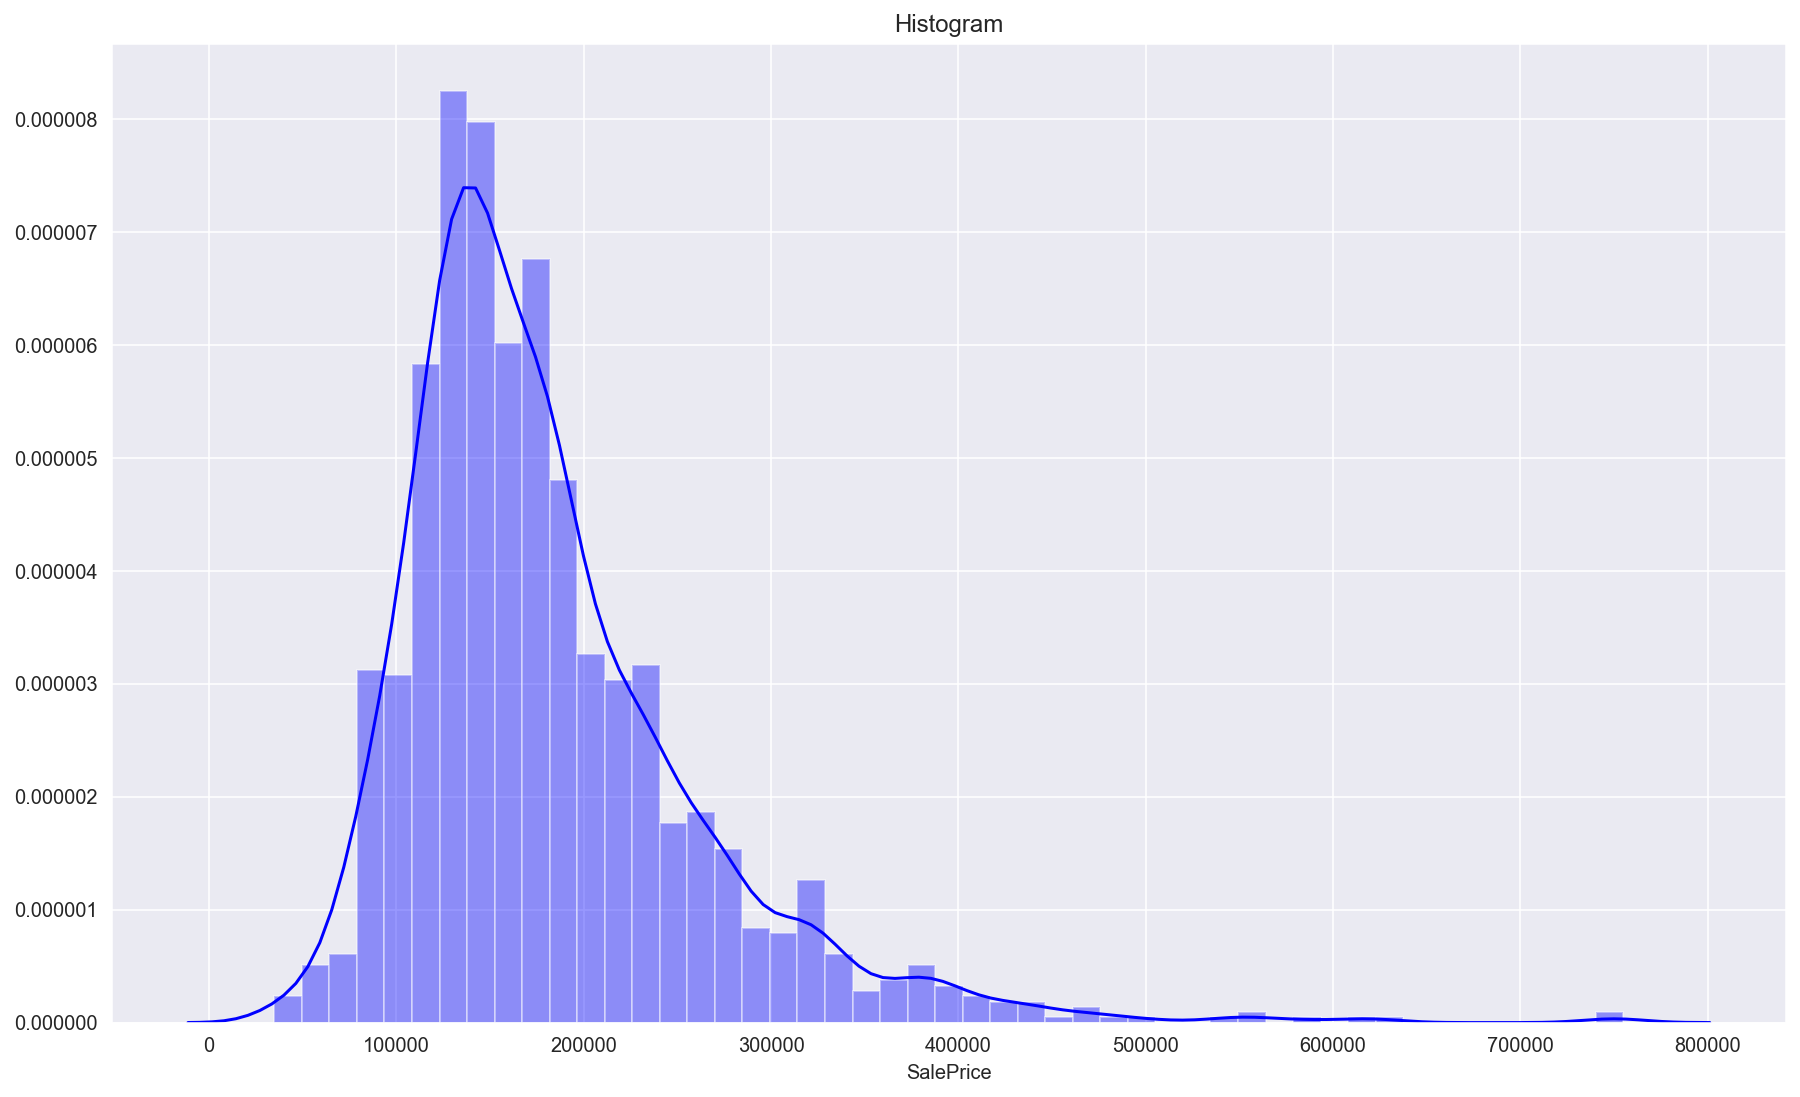

In [265]:
#Lets take a look at the dependent variable
continuousVariable(df,'SalePrice')

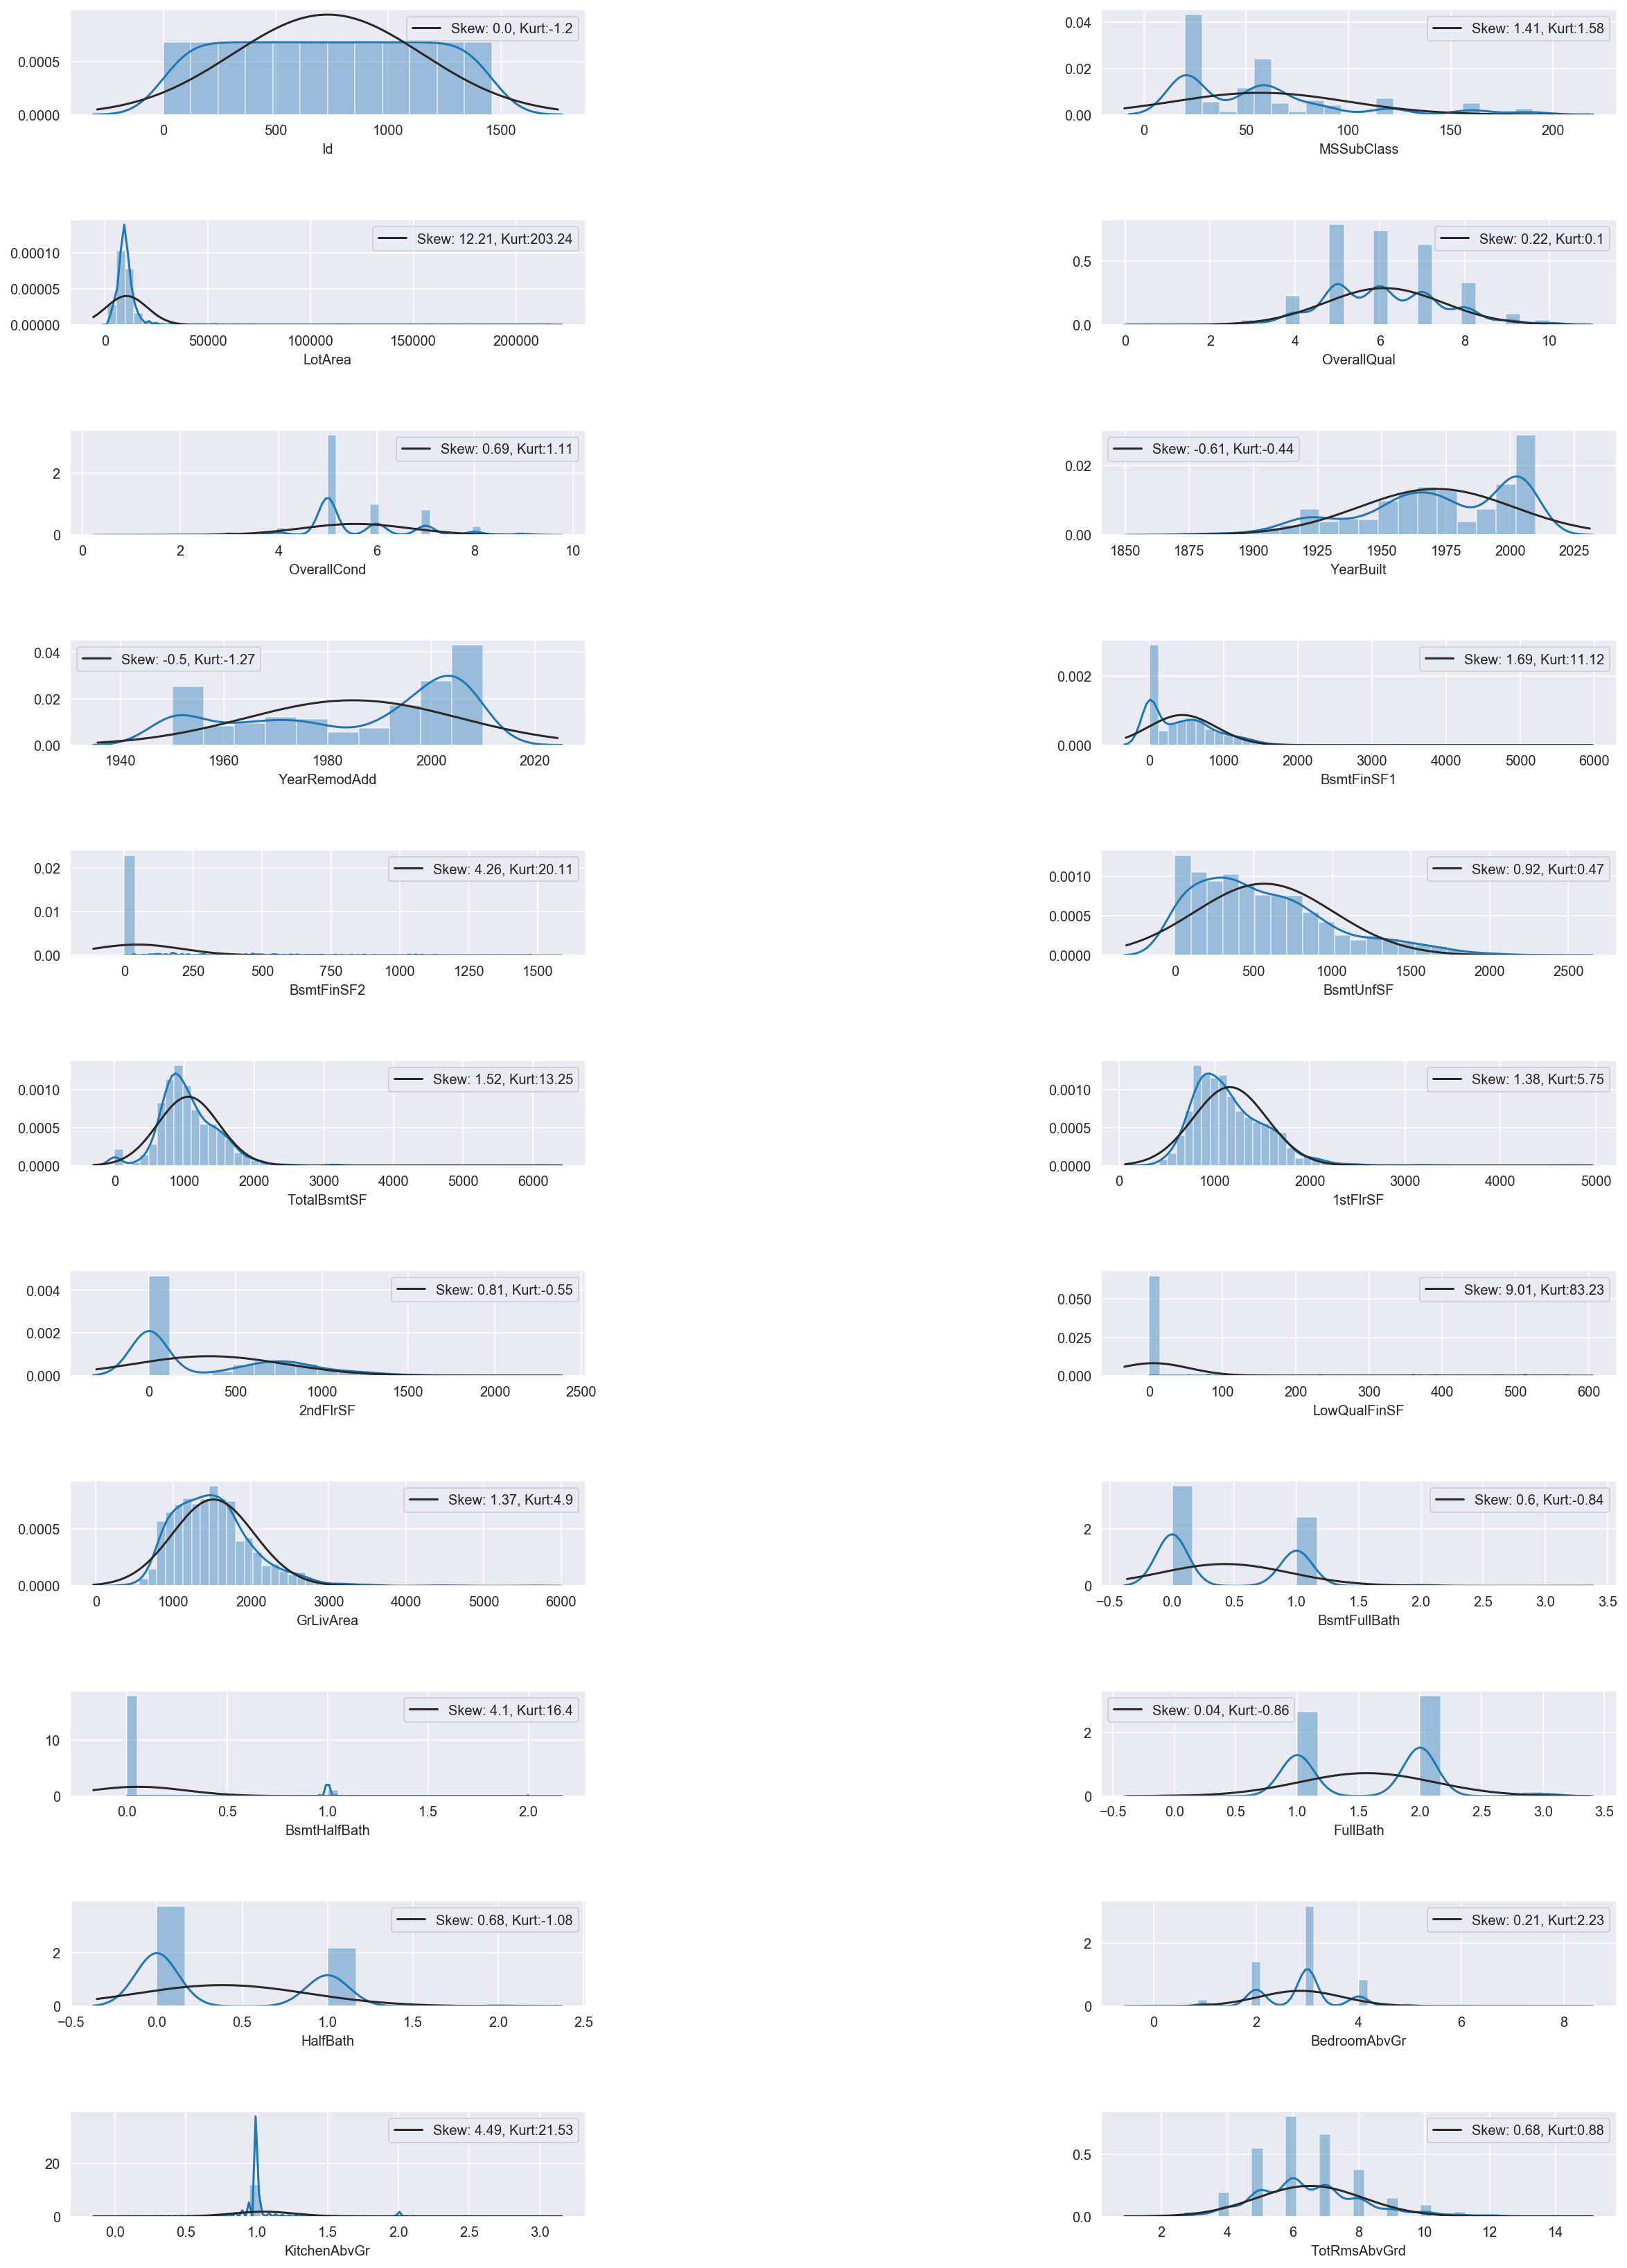

In [266]:
NumericalEDA('Histogram',22,2,df,df.select_dtypes(include=numerics).columns,'SalePrice')


In [281]:
df[['MSSubClass','Total_porch_sf' ,'Total_sqr_footage','Total_Bathrooms','LotArea', 'BsmtUnfSF','SalePrice','Total_porch_sf','Total_sqr_footage']]

MSSubClass  Total_porch_sf  Total_sqr_footage  Total_Bathrooms  LotArea  \
0             60              61               2416              3.5     8450   
1             20             298               2240              2.5     9600   
2             60              42               2272              3.5    11250   
3             70             307               1933              2.0     9550   
4             60             276               2853              3.5    14260   
5             50             390               2094              2.5    14115   
6             20             312               3063              3.0    10084   
7             60             667               2981              3.5    10382   
8             50             295               1774              2.0     6120   
9            190               4               1928              2.0     7420   
10            20               0               1946              2.0    11200   
12            20             316               1649              2.0    12968   
13            20             193               1494              2.0    10652   
14            20             389               1986              2.5    10920   
15            45             160                854              1.0     6120   
16            20               0               1582              2.0    11241   
17            90               0               1296              2.0    10791   
18            20             102               1760              2.5    13695   
19            20               0               1843              1.0     7560   
20            60             394               2376              3.5    14215   
21            45             205               1108              1.0     7449   
22            20             330               1795              2.0     9742   
23           120             210               1900              2.0     4224   
24            20             496               1916              2.0     8246   
25            20              56               1600              2.0    14230   
26            20             254               1620              1.5     7200   
27            20              50               2922              3.0    11478   
28            20             546               2877              2.0    16321   
29            30             136                520              1.0     6324   
30            70             226               1317              1.0     8500   
31            20              65               1228              1.5     8544   
32            20              30               1234              2.0    11049   
33            20              38               2718              2.0    10552   
34           120             250               2714              3.0     7313   
35            60             145               2452              3.5    13418   
36            20             456               1097              1.5    10859   
37            20               0               2510              1.5     8532   
38            20              52               1788              2.0     7922   
39            90               0               1152              2.0     6040   
40            20             138               1967              2.0     8658   
41            20             104               2295              2.0    16905   
42            85             240               1724              2.0     9180   
43            20             145               1709              2.0     9200   
44            20               0               1835              2.0     7945   
45           120             278               2208              3.0     7658   
46            50             409               3500              2.5    12822   
47            20             146               1680              2.0    11096   
48           190             102               1452              2.0     4456   
49            20               0     

In [305]:
#Treating Multi-colinearity



# Binariaizing non important features: BsmtFinType1,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,2ndFlrSF,GarageArea,TotalBsmtSF,hasfireplace
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +df['EnclosedPorch'] + df['ScreenPorch'] +df['WoodDeckSF'])
df['BsmtFinType1_Unf'] = 1*(df['BsmtFinType1'] == 'Unf')
df['HasWoodDeck'] = (df['WoodDeckSF'] == 0) * 1
df['HasOpenPorch'] = (df['OpenPorchSF'] == 0) * 1
df['HasEnclosedPorch'] = (df['EnclosedPorch'] == 0) * 1
df['Has3SsnPorch'] = (df['3SsnPorch'] == 0) * 1
df['HasScreenPorch'] = (df['ScreenPorch'] == 0) * 1



#
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['hasMiscVal'] = (df['MiscVal'] == 0) * 1
df['LowQualFinSF'] = (df['LowQualFinSF'] == 0) * 1


# Buliding new features, Total_sqr_footage,Total_Bathrooms,Total_porch_sf and remvoing base features

df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +df['1stFlrSF'] + df['2ndFlrSF'])
df['hasBsmt1'] = df['BsmtFinSF1'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['BsmtFinSF2'].apply(lambda x: 1 if x > 0 else 0)
df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)
df['Total_Home_Quality'] = df['OverallQual'].astype(int) + df['OverallCond'].astype(int)
df['Total_Bathrooms'] = (df['FullBath'].astype(int) + (0.5 * df['HalfBath']) +df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))



df = df.drop(['PoolArea', '2ndFlrSF','TotalBsmtSF','Fireplaces'], axis=1)
df = df.drop(['WoodDeckSF', 'OpenPorchSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis=1)
df = df.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1)
df = df.drop(['YearRemodAdd'], axis=1)
df = df.drop(['Utilities', 'Street', 'PoolQC','OverallQual','OverallCond'], axis=1)



df['has_1stFloor'] = df['1stFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(['GarageArea','FullBath','MiscVal','LowQualFinSF','HalfBath','BsmtFullBath','BsmtHalfBath','1stFlrSF', 'GrLivArea'], axis=1)

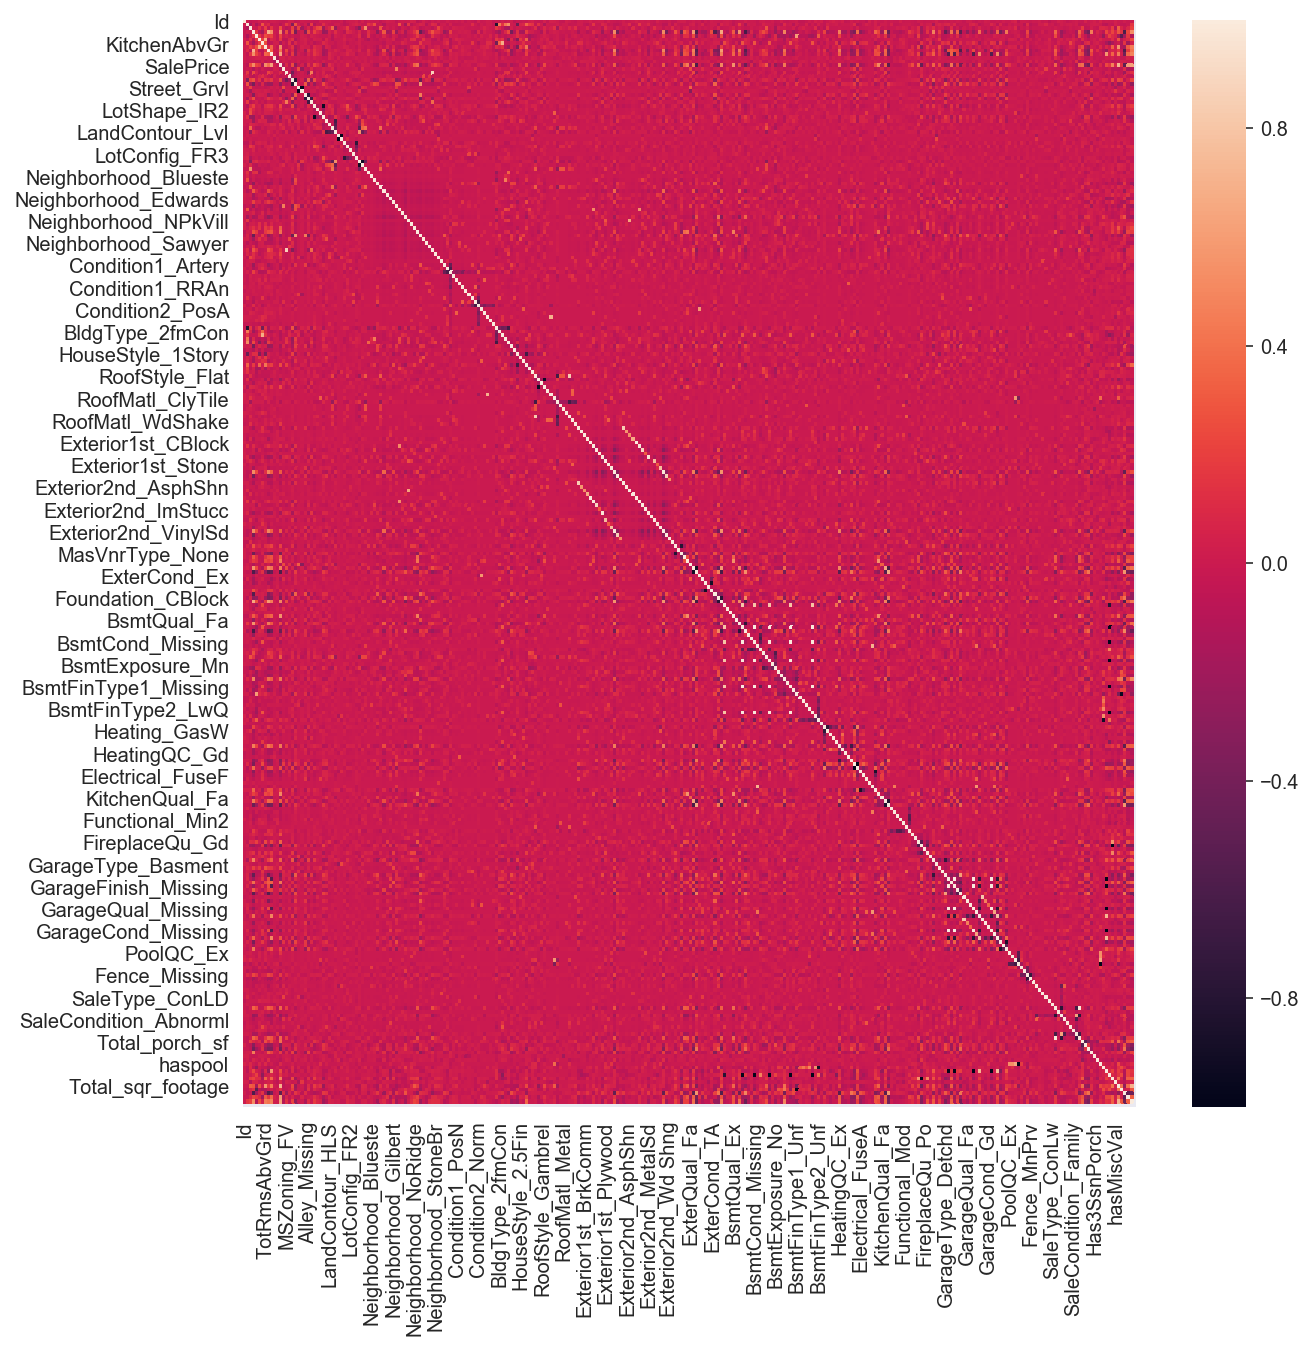

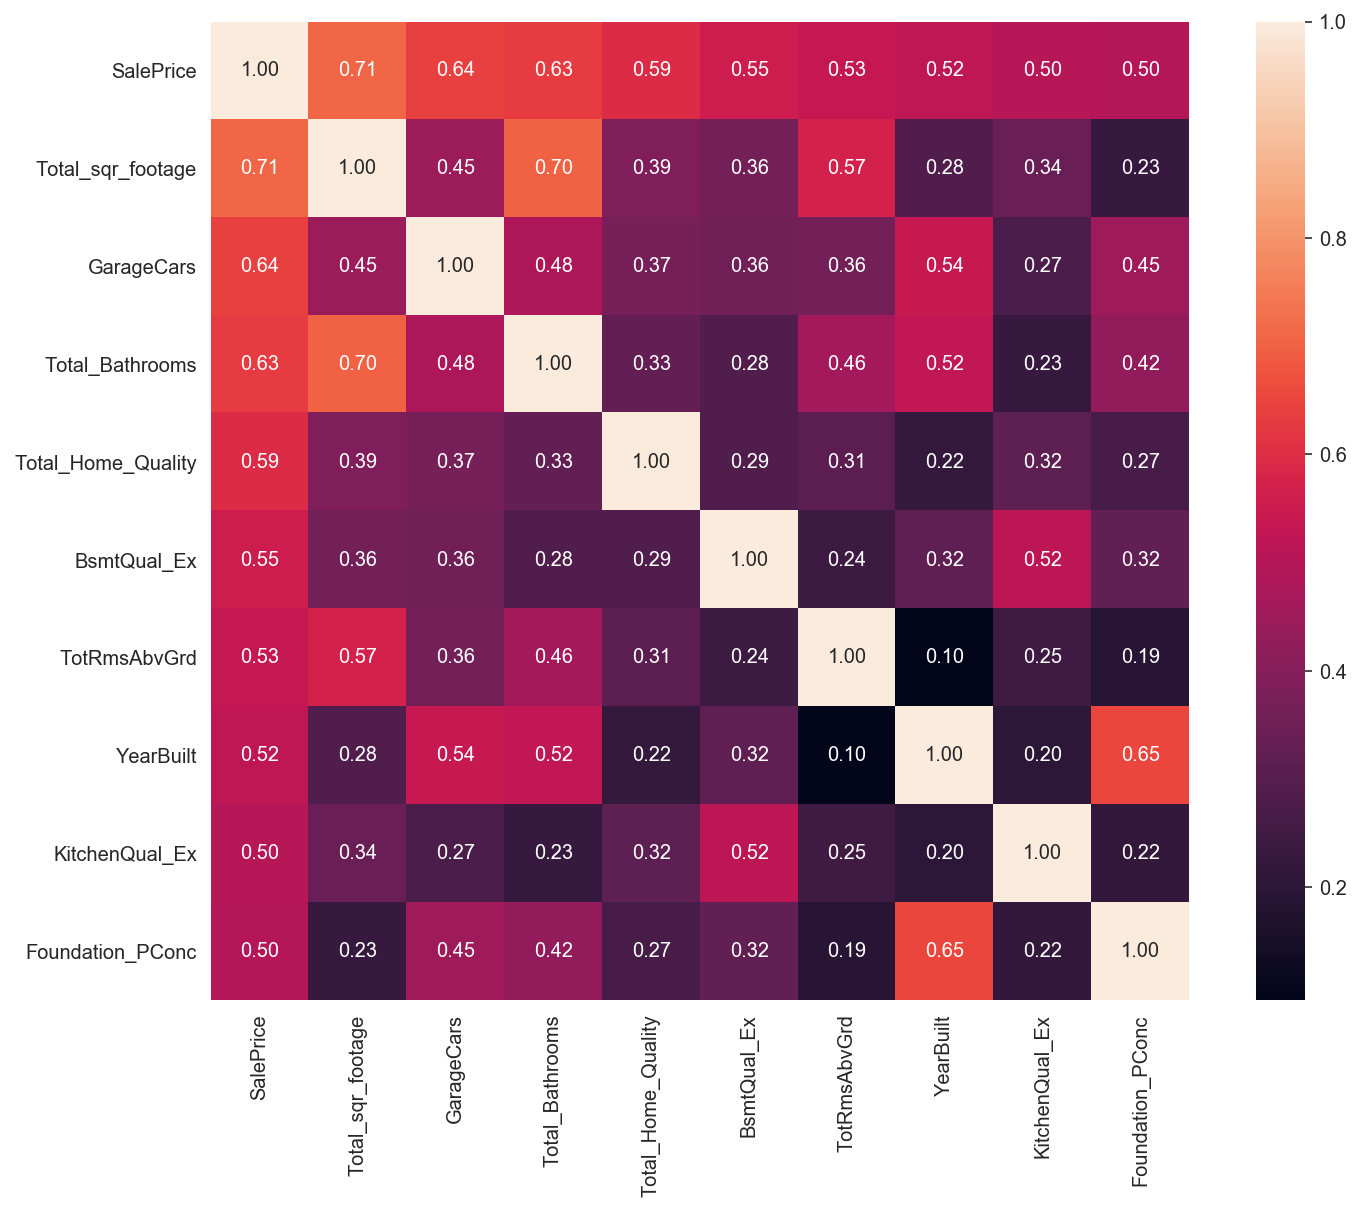

In [306]:
# Lets look at highly correlated Numerical variables
numerical=['MSSubClass','Total_porch_sf' ,'Total_sqr_footage','Total_Bathrooms','LotArea', 'BsmtUnfSF','SalePrice','Total_porch_sf','Total_sqr_footage']
NumericalEDA('Heatmap',18,2,df,numerical,'SalePrice')

In [307]:
#Treating outliers:

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.SalePrice))
df = df[(z < 1.96)]

In [310]:
df[numerical]

MSSubClass  Total_porch_sf  Total_sqr_footage  Total_Bathrooms  LotArea  \
0             60              61               2416              3.5     8450   
1             20             298               2240              2.5     9600   
2             60              42               2272              3.5    11250   
3             70             307               1933              2.0     9550   
4             60             276               2853              3.5    14260   
5             50             390               2094              2.5    14115   
6             20             312               3063              3.0    10084   
7             60             667               2981              3.5    10382   
8             50             295               1774              2.0     6120   
9            190               4               1928              2.0     7420   
10            20               0               1946              2.0    11200   
12            20             316               1649              2.0    12968   
13            20             193               1494              2.0    10652   
14            20             389               1986              2.5    10920   
15            45             160                854              1.0     6120   
16            20               0               1582              2.0    11241   
17            90               0               1296              2.0    10791   
18            20             102               1760              2.5    13695   
19            20               0               1843              1.0     7560   
20            60             394               2376              3.5    14215   
21            45             205               1108              1.0     7449   
22            20             330               1795              2.0     9742   
23           120             210               1900              2.0     4224   
24            20             496               1916              2.0     8246   
25            20              56               1600              2.0    14230   
26            20             254               1620              1.5     7200   
27            20              50               2922              3.0    11478   
28            20             546               2877              2.0    16321   
29            30             136                520              1.0     6324   
30            70             226               1317              1.0     8500   
31            20              65               1228              1.5     8544   
32            20              30               1234              2.0    11049   
33            20              38               2718              2.0    10552   
34           120             250               2714              3.0     7313   
35            60             145               2452              3.5    13418   
36            20             456               1097              1.5    10859   
37            20               0               2510              1.5     8532   
38            20              52               1788              2.0     7922   
39            90               0               1152              2.0     6040   
40            20             138               1967              2.0     8658   
41            20             104               2295              2.0    16905   
42            85             240               1724              2.0     9180   
43            20             145               1709              2.0     9200   
44            20               0               1835              2.0     7945   
45           120             278               2208              3.0     7658   
46            50             409               3500              2.5    12822   
47            20             146               1680              2.0    11096   
48           190             102               1452              2.0     4456   
49            20               0     

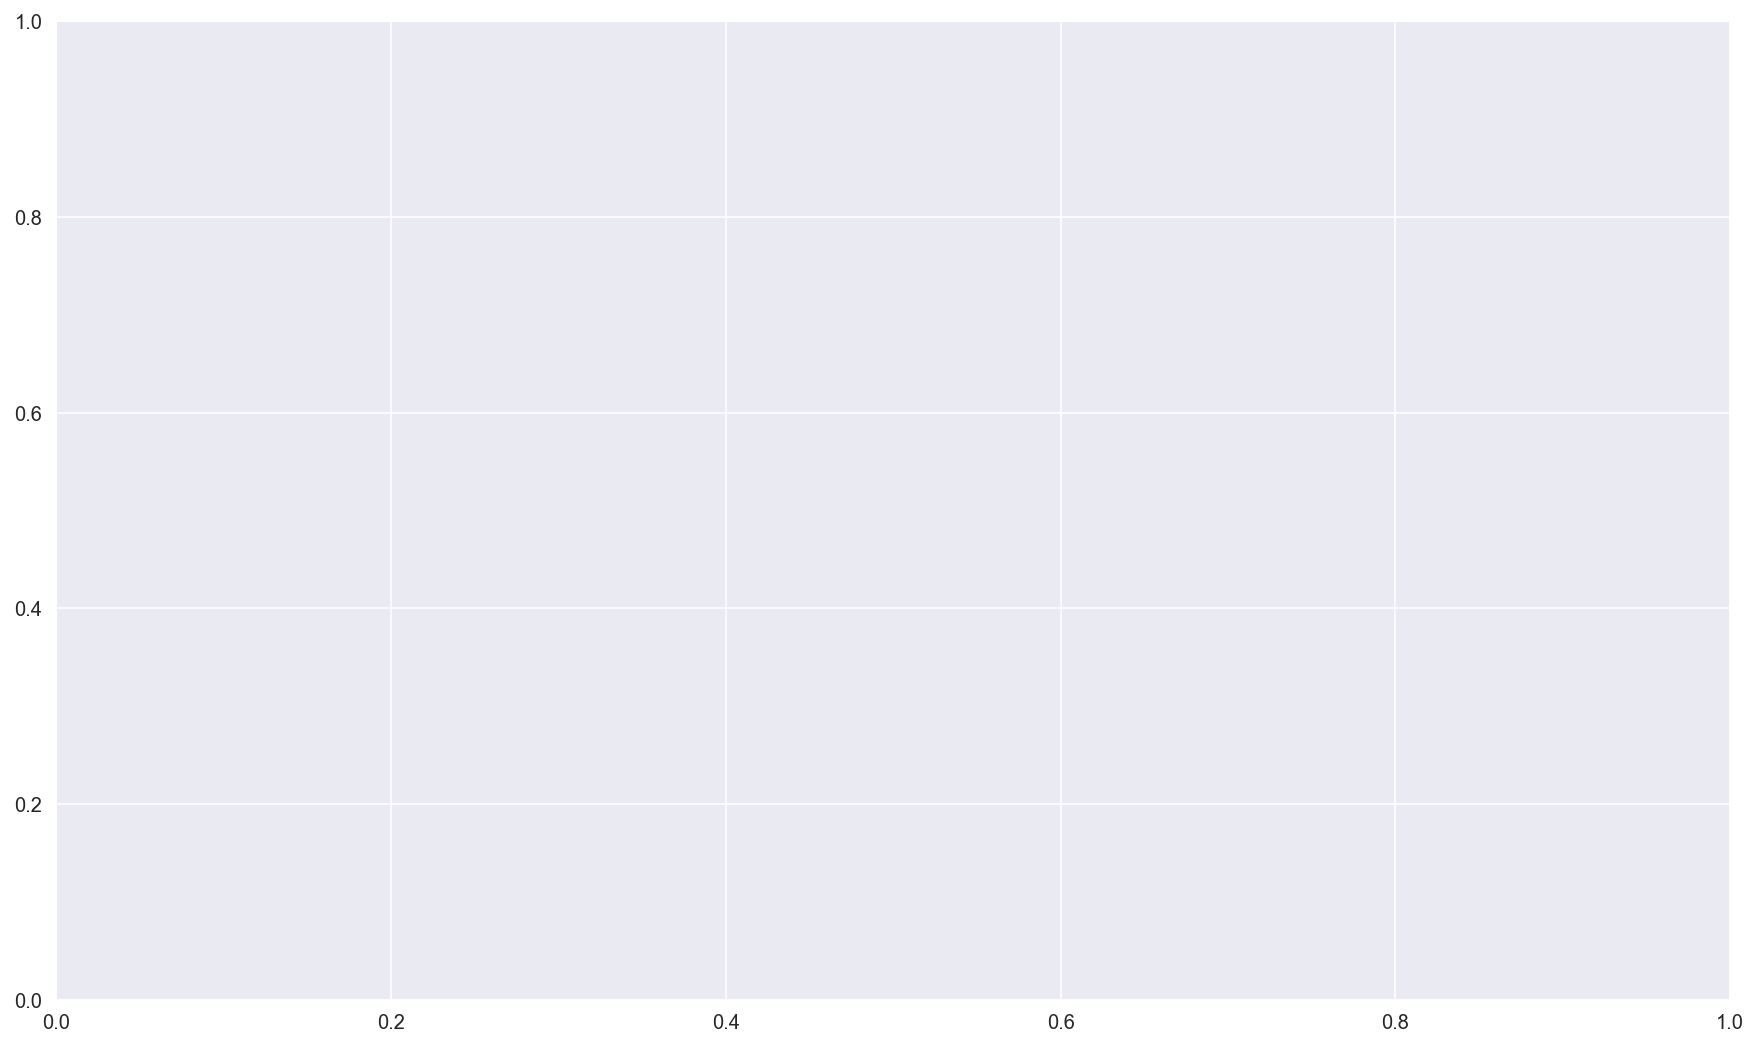

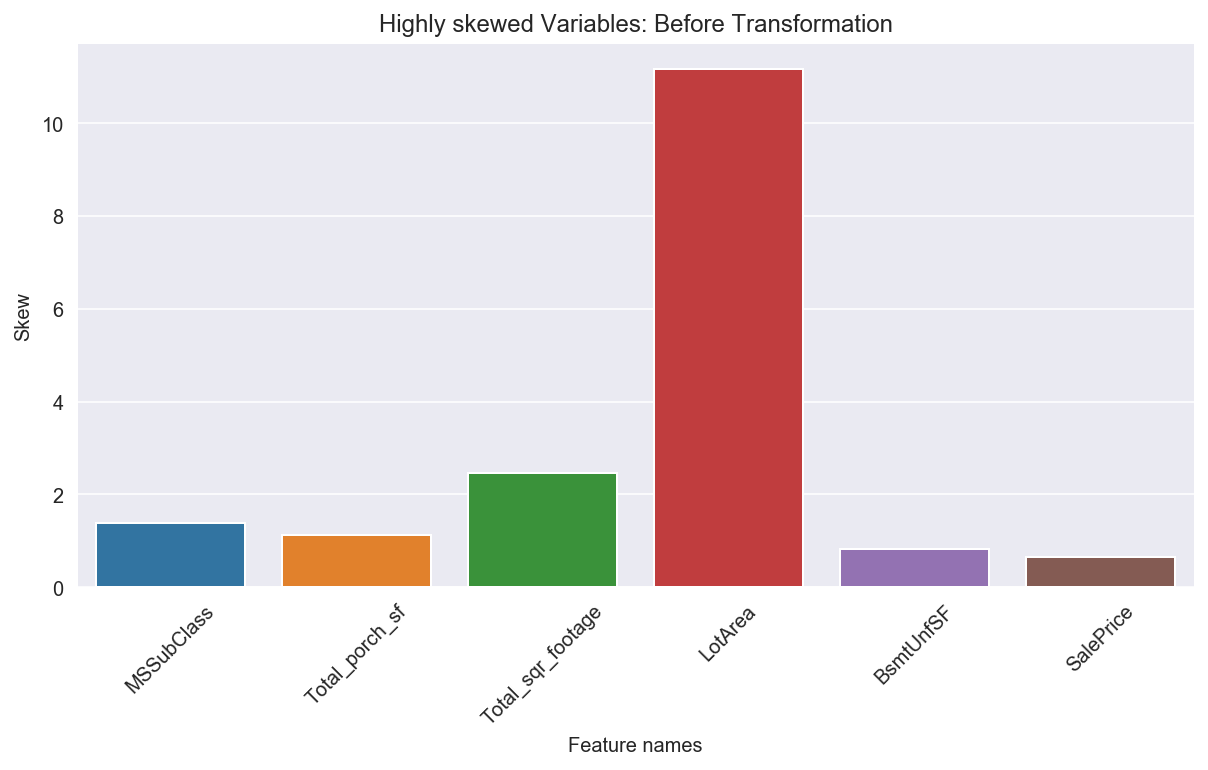

<Figure size 720x360 with 0 Axes>

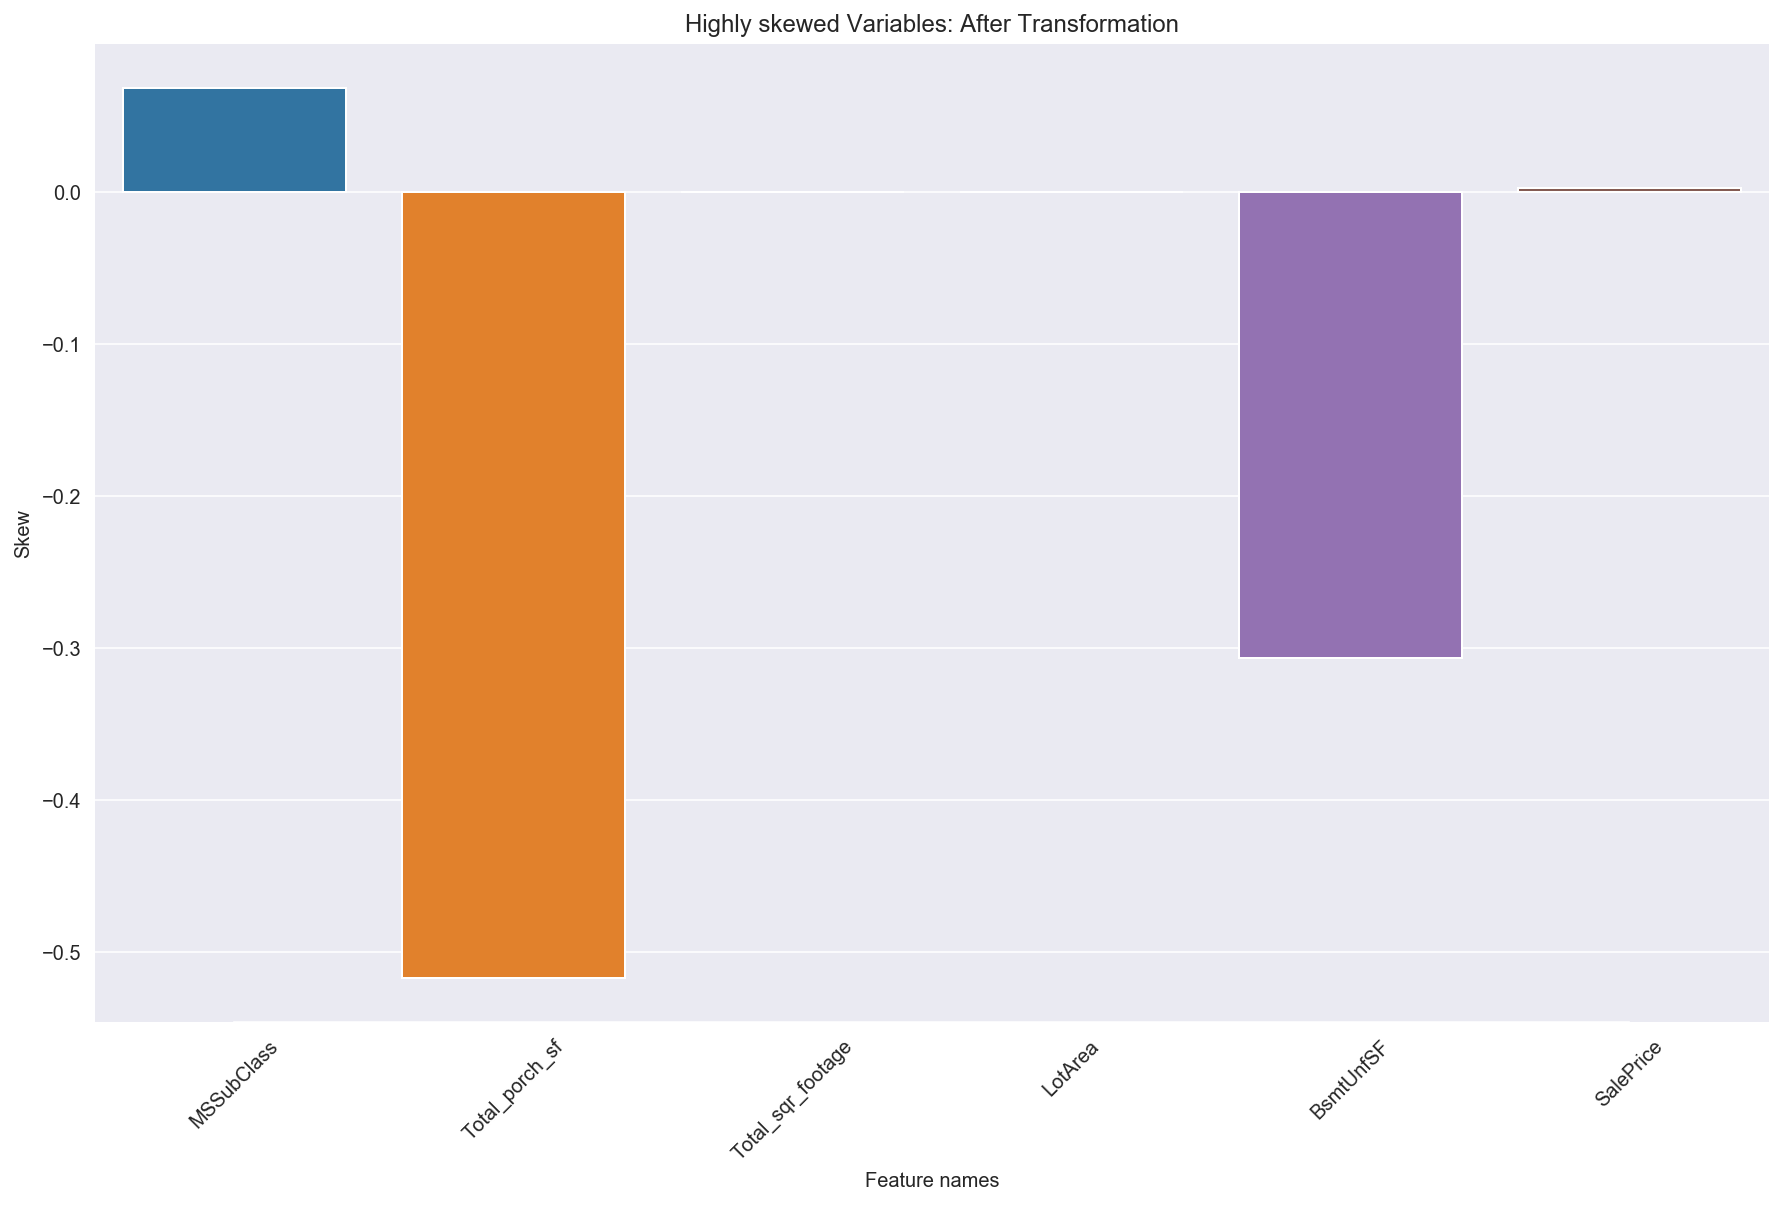

<Figure size 720x360 with 0 Axes>

In [311]:
#skew Features
normalize(data=df,columns=numerical)

Skewness:0.0026916052211435936
Kurtosis:0.008008728709640422


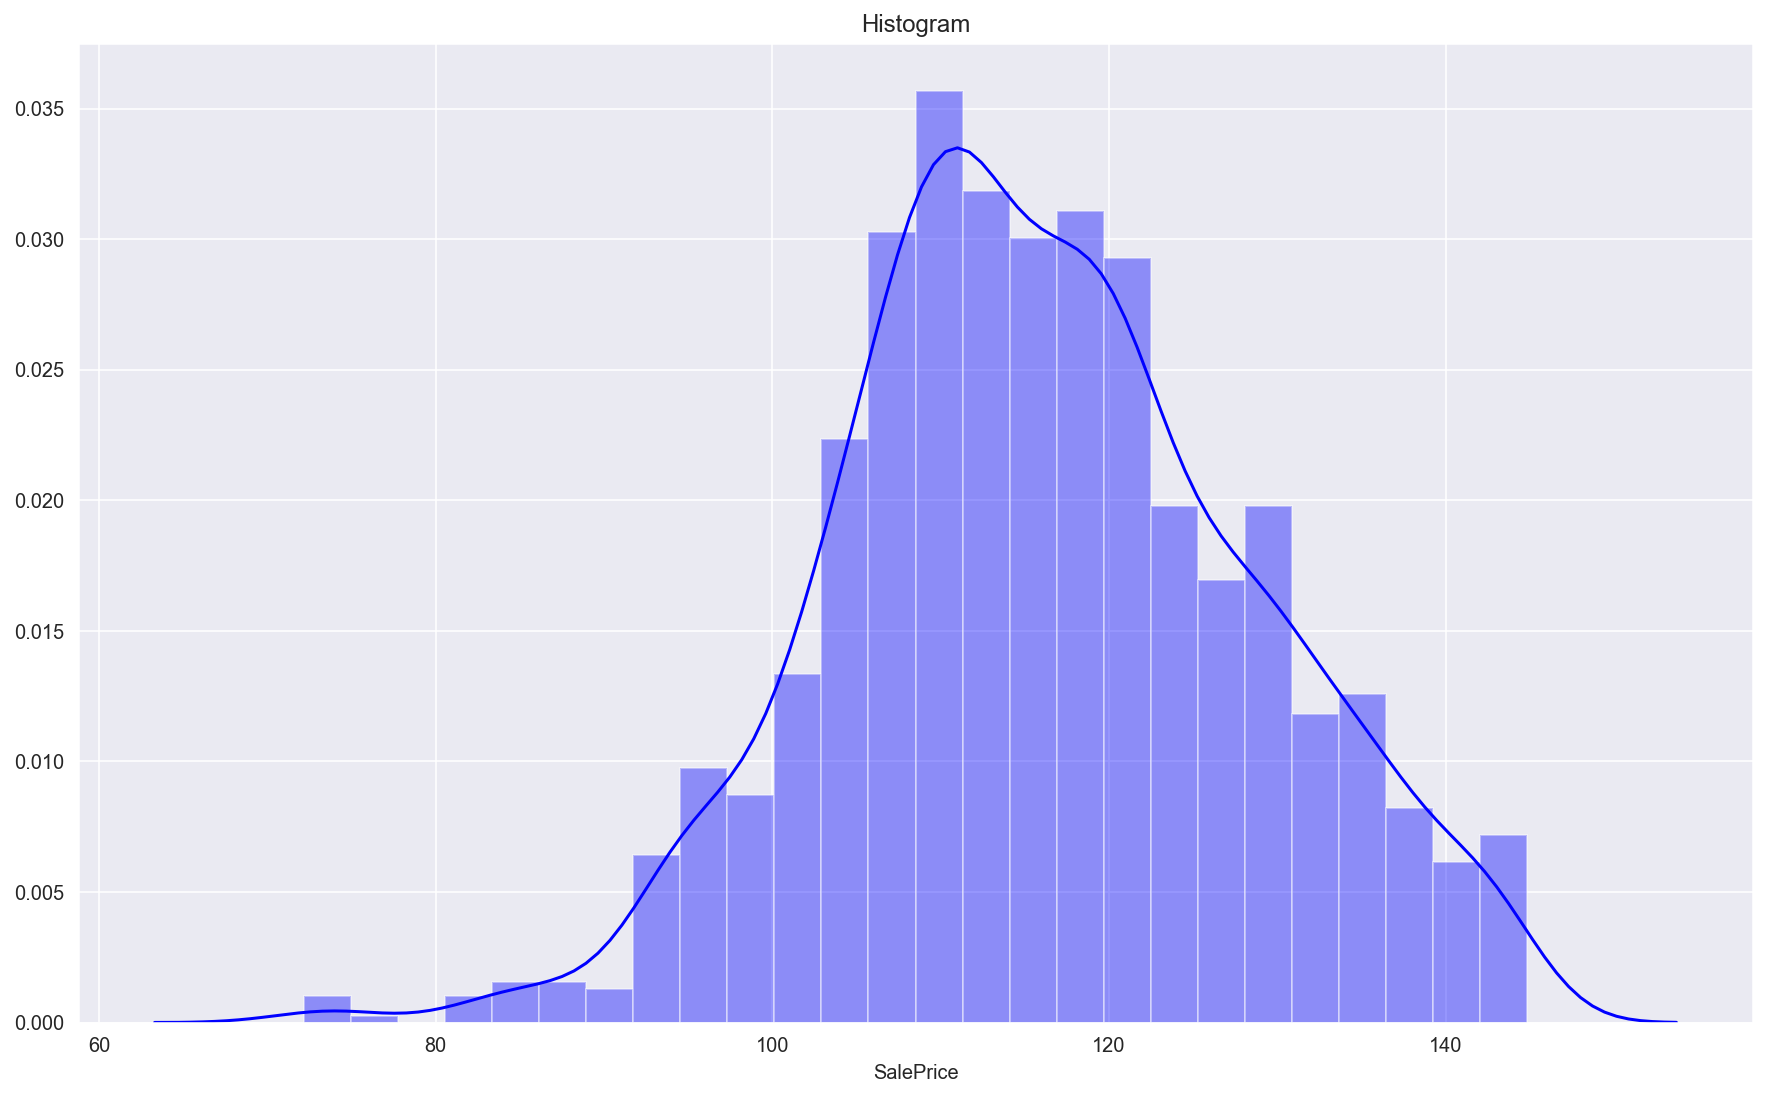

In [312]:
#Lets take a look at the dependent variable
continuousVariable(df,'SalePrice')

IndexError: list index out of range

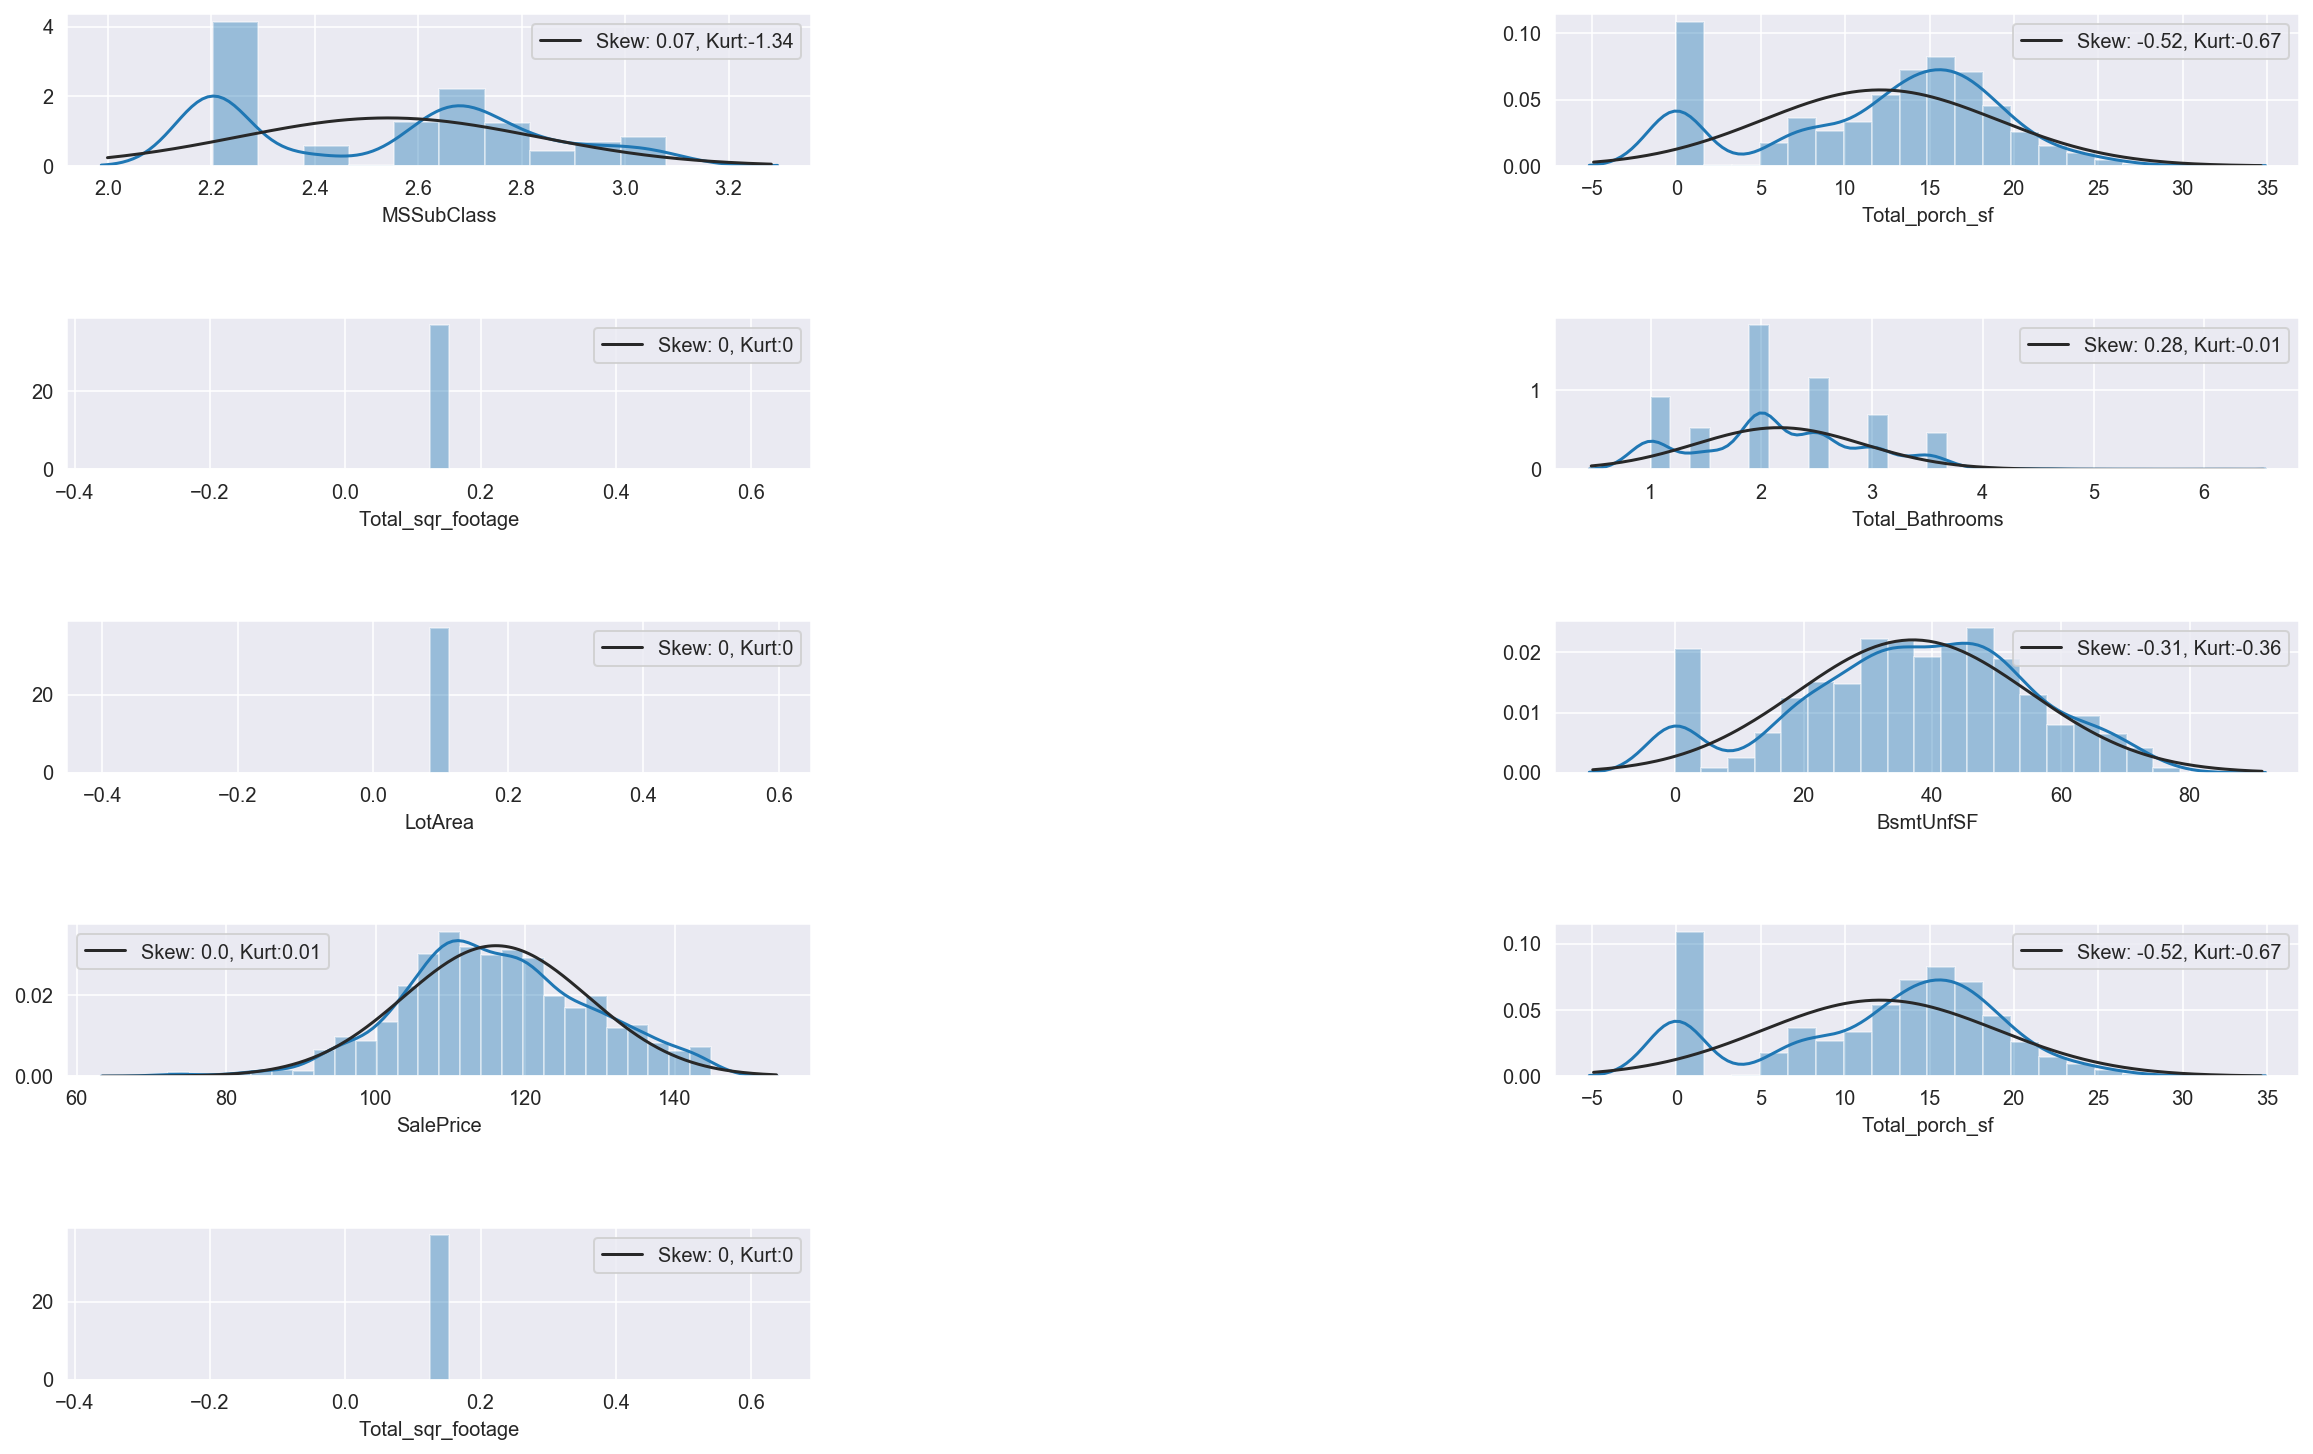

In [313]:
NumericalEDA('Histogram',22,2,df,numerical,'SalePrice')

In [314]:
x,y=df[df.columns.difference(cat_cols)].drop(['SalePrice','Id'], axis=1), df.SalePrice
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [316]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')

Coefficients: [ 5.92019917e+08  5.92019918e+08  5.92019920e+08 -7.63001081e+10
 -7.63001081e+10 -7.63001081e+10 -7.63001081e+10 -7.63001081e+10
  9.99227677e+11  9.99227677e+11  4.13446894e+11  9.99227677e+11
  9.99227677e+11 -5.17778689e+10 -5.17778689e+10 -5.17778689e+10
 -5.17778689e+10 -5.17778689e+10 -2.29533906e+09 -2.29533906e+09
 -2.29533906e+09 -2.29533906e+09  1.26061645e+11 -2.29533906e+09
 -1.21493051e+11  1.61899773e+10  1.61899773e+10  1.61899773e+10
  1.61899773e+10  1.61899773e+10  1.61899773e+10 -5.99676628e+10
 -3.53302283e+10 -3.53302283e+10 -3.53302283e+10  1.11663190e+11
 -3.53302283e+10  7.31811523e-02  7.71739982e+10  7.71739982e+10
 -3.57452691e+09 -3.57452691e+09 -3.57452691e+09 -3.57452690e+09
 -3.57452690e+09 -3.57452691e+09 -3.57452691e+09 -3.57452691e+09
 -3.57452690e+09  4.58032462e+09  4.58032462e+09  4.58032463e+09
  4.58032464e+09 -5.85188035e+09  9.12551016e+09  1.73420348e+10
  4.58032463e+09 -4.45919473e+10 -4.45919473e+10 -4.45919473e+10
 -4.4591947

In [317]:

import statsmodels.api as sm

X_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     31.50
Date:                Thu, 07 Nov 2019   Prob (F-statistic):          2.42e-274
Time:                        20:33:43   Log-Likelihood:                -2715.3
No. Observations:                 975   AIC:                             5865.
Df Residuals:                     758   BIC:                             6924.
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Alley_Grvl                1.3965      0.803      1.738      0.083      -0.181       2.974
Alley_Missing             2.0490      0.573      3.576      0.000       0.924       3.174
Alley_Pave                4.4904      0.793      5.661      0.000       2.933       6.048
BldgType_1Fam             3.2437      0.946      3.430      0.001       1.387       5.100
BldgType_2fmCon           3.4072      1.235      2.760      0.006       0.983       5.831
BldgType_Duplex           5.0853      1.025      4.959      0.000       3.072       7.098
BldgType_Twnhs           -3.0731      1.045     -2.940      0.003      -5.125      -1.021
BldgType_TwnhsE          -0.7273      0.885     -0.822      0.412      -2.465       1.010
BsmtCond_Fa              -0.8464      1.659     -0.510      0.610      -4.104       2.411
BsmtCond_Gd               0.8560      1.691      0.506      0.613      -2.464       4.176
BsmtCond_Missing          3.4091      1.323      2.578      0.010       0.813       6.005
BsmtCond_Po               4.0712      4.795      0.849      0.396      -5.341      13.484
BsmtCond_TA               0.4460      1.587      0.281      0.779      -2.669       3.561
BsmtExposure_Av           1.9694      1.015      1.940      0.053      -0.024       3.963
BsmtExposure_Gd           4.5169      1.103      4.094      0.000       2.351       6.683
BsmtExposure_Missing     -2.6492      3.606     -0.735      0.463      -9.728       4.430
BsmtExposure_Mn           2.3341      1.059      2.205      0.028       0.256       4.412
BsmtExposure_No           1.7646      0.977      1.806      0.071      -0.153       3.683
BsmtFinType1_ALQ          0.0631      0.430      0.147      0.883      -0.782       0.908
BsmtFinType1_BLQ          0.4487      0.493      0.910      0.363      -0.519       1.416
BsmtFinType1_GLQ          1.4125      0.464      3.046      0.002       0.502       2.323
BsmtFinType1_LwQ          0.4448      0.647      0.687      0.492      -0.826       1.716
BsmtFinType1_Missing      3.4091      1.323      2.578      0.010       0.813       6.005
BsmtFinType1_Rec          0.7073      0.514      1.376      0.169      -0.302       1.717
BsmtFinType1_Unf          1.4504      0.723      2.006      0.045       0.031       2.870
BsmtFinType2_ALQ          0.7930      1.605      0.494      0.621      -2.358       3.944
BsmtFinType2_BLQ         -0.6391      1.197     -0.534      0.593      -2.988       1.710
BsmtFinType2_GLQ          1.1637      1.653      0.704      0.482      -2.081       4.408
BsmtFinType2_LwQ          1.5394      1.214      1.268      0.205      -0.843       3.922
BsmtFinType2_Missing      3.0619      3.894      0.786      0.432      -4.581      10.705
BsmtFinType2_Rec         -0.0175      1.168     -0.015      0.988      -2.310       2.275
BsmtFinType2_Unf       

Jarque-Bera test ---- statistic: 155.3909, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9810, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.2640, p-value: 0.0000
Anderson-Darling test ---- statistic: 3.5217, 5% critical value: 0.7840
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


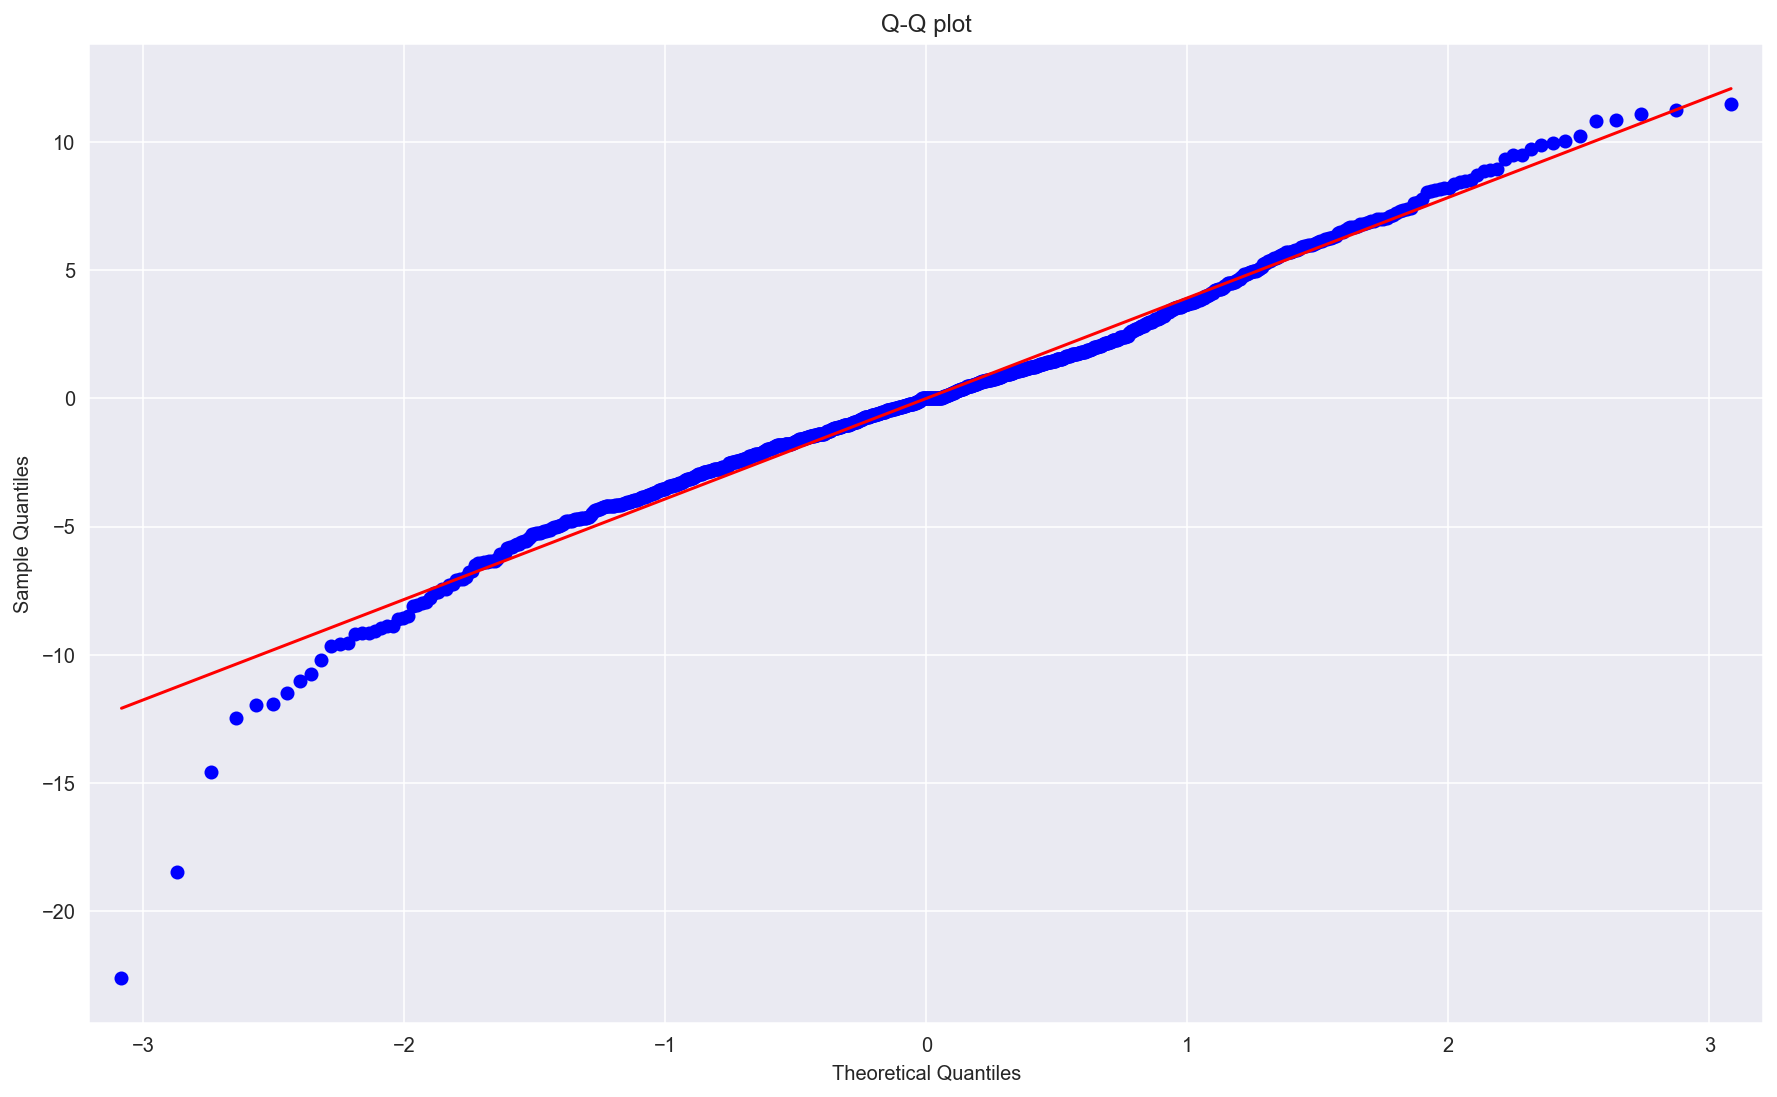

In [318]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

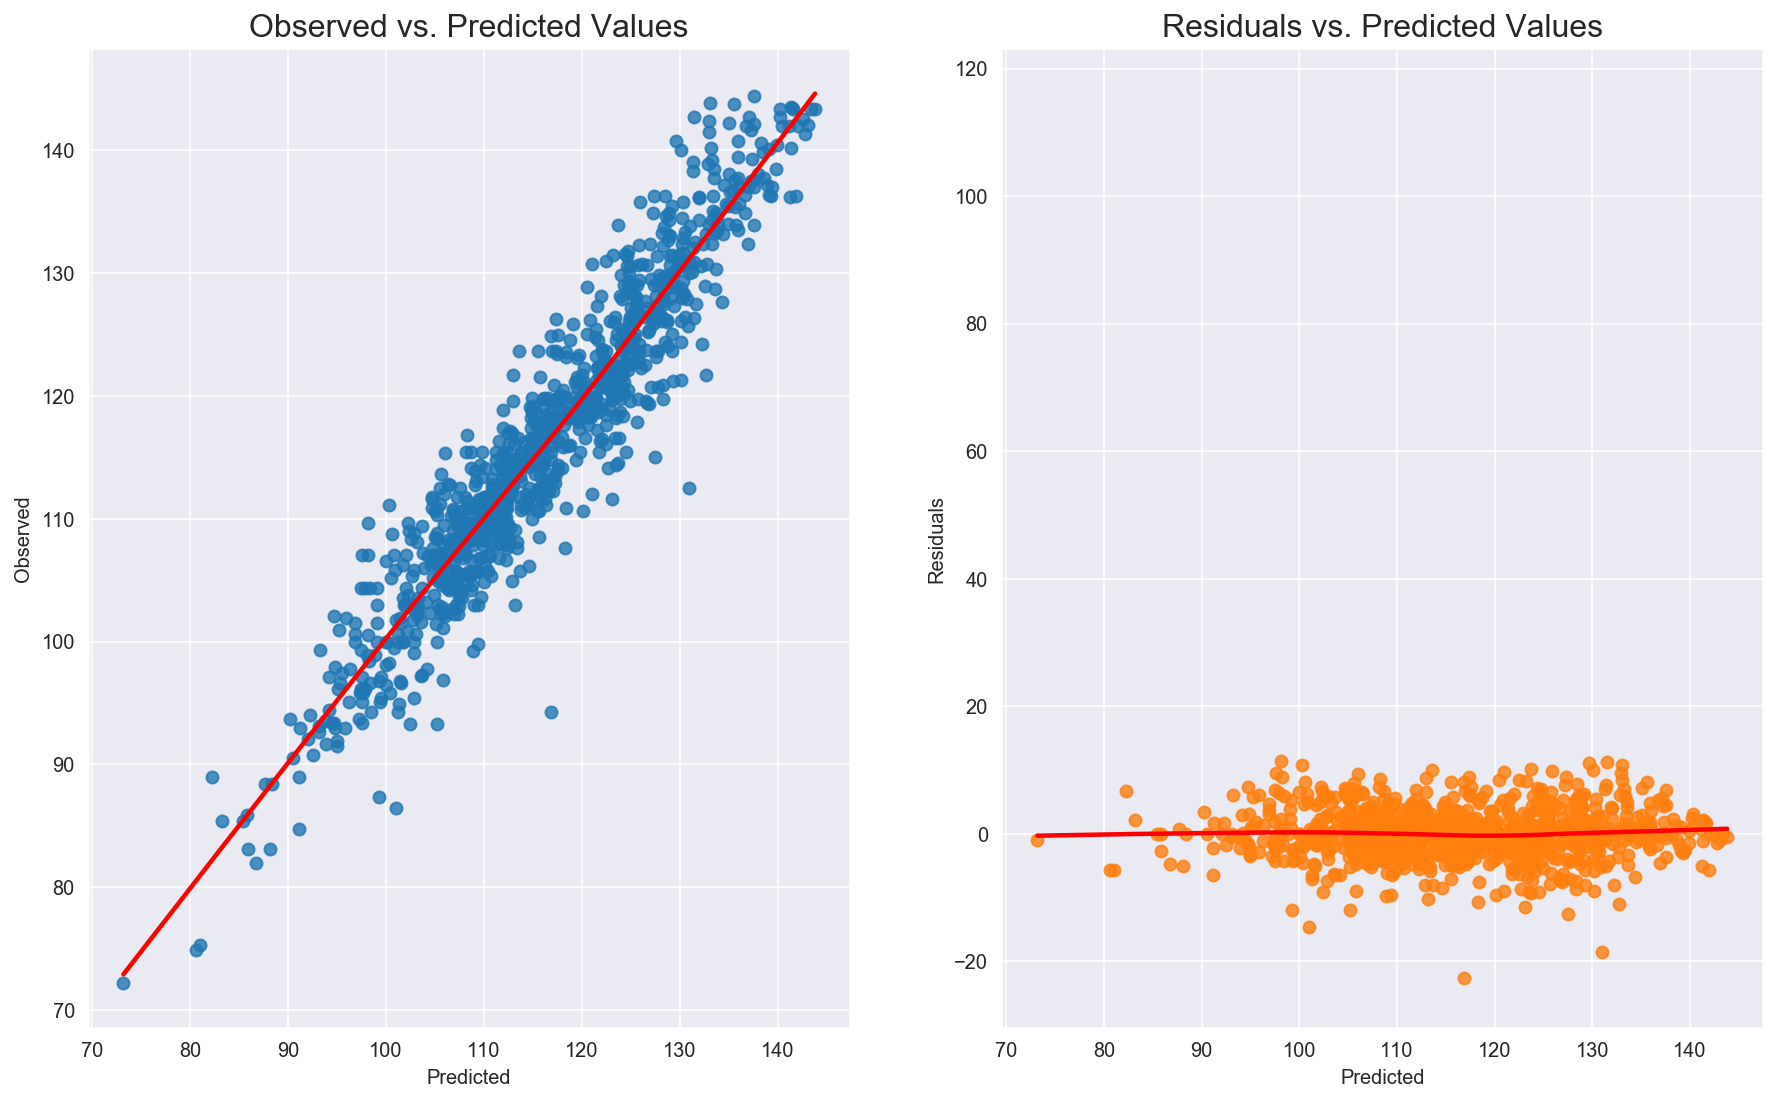

In [319]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y_train)  


 Breusch-Pagan test ----
                                    value
Lagrange multiplier statistic  218.964208
p-value                          0.998122
f-value                          1.016357
f p-value                        0.432853

 Goldfeld-Quandt test ----
                value
F statistic  1.125275
p-value      0.157753

 Residuals plots ----


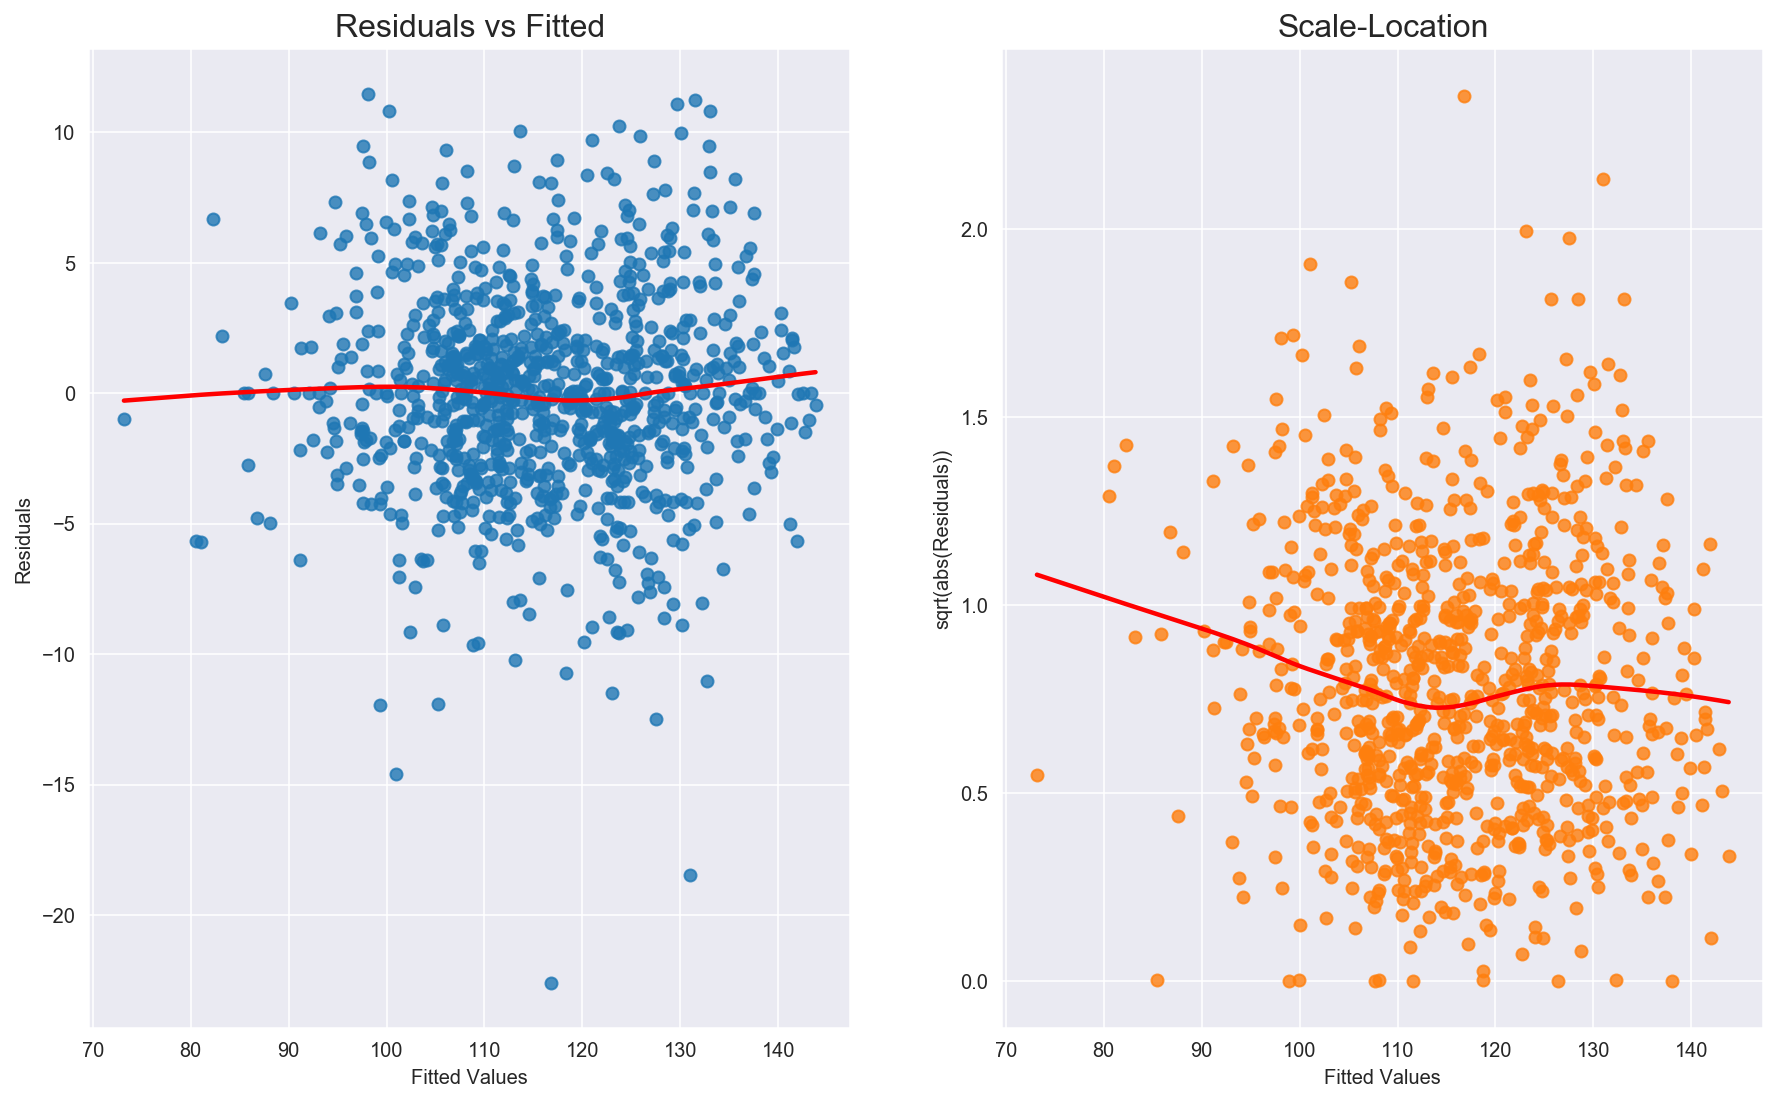

In [320]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

In [322]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
regression_model.score(x_test, y_test)


-2.64248554903888e+16

In [323]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp

rms = sqrt(mean_squared_error((y_test), regression_model.predict(x_test)))
print(rms)

2011170204.3072424


In [325]:
np.power((2011170204.3072424* 0.29334640196240575 + 1),(1/ 0.29334640196240575))





7.929090145161821e+29

In [242]:
np.exp(np.log( 0.29334640196240575*6+1)/ 0.29334640196240575)


31.847418883819667

In [160]:
from scipy.special import boxcox, inv_boxcox
y = boxcox(df1.SalePrice, - 0.29334640196240575)
z=inv_boxcox(y, - 0.29334640196240575)
z

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

In [243]:
x_train.columns

Index(['BedroomAbvGr', 'BsmtUnfSF', 'GarageCars', 'GarageYrBlt',
       'Has3SsnPorch', 'HasEnclosedPorch', 'HasOpenPorch', 'HasScreenPorch',
       'HasWoodDeck', 'KitchenAbvGr', 'LotArea', 'LowQualFinSF', 'MSSubClass',
       'MiscVal', 'MoSold', 'TotRmsAbvGrd', 'Total_Bathrooms',
       'Total_Home_Quality', 'Total_porch_sf', 'Total_sqr_footage',
       'YearBuilt', 'YearsSinceRemodel', 'YrSold', 'has2ndfloor', 'hasBsmt1',
       'has_1stFloor', 'hasbsmt', 'hasfireplace', 'hasgarage', 'haspool'],
      dtype='object')

In [166]:
df.SalePrice.describe()

count    1247.000000
mean       -0.027286
std         0.682578
min        -1.453065
25%        -0.540664
50%        -0.064426
75%         0.468440
max         1.418900
Name: SalePrice, dtype: float64

In [6]:
def continuousVariable(df=None,col=None):
    df[col].describe()
    ax=sns.distplot(df[col],color="Blue")
    ax.set(xlabel=col, title="Histogram")
    print("Skewness:{}".format(df[col].skew()))
    print("Kurtosis:{}".format(df[col].kurt()))

In [7]:

def ordinal_meanencoding(data=None, col=None, label=None, ordinalCols=None):
    for i in col:
        a=i+'Ordinal'
        ordinalCols.append(a)
        df[a]=df[i].map(dict(zip(df.groupby(i)[label].mean().sort_values(ascending=False).index.to_list(), [i for i in range(1,len(df.groupby(i)[label].mean().sort_values(ascending=False).index.to_list()))])))

In [8]:
def NumericalEDA(viz_type=None,rows=None,cols=None,data=None,column=[],label=None):
    if viz_type=='Histogram':
        fig=plt.figure(figsize=(20,60))
        fig.subplots_adjust(hspace=1,wspace=1)
        c=0
        for i in range(1,rows+1):
            if data[column[c]].isnull().any():
                data[column[c]]=data[column[c]].fillna(data[column[c]].mean())
            ax=fig.add_subplot(rows,cols,i)
            ax=sns.distplot(df[column[c]], fit=stats.norm)
            #ax.set(title=column[c])
            plt.legend(["Skew: {}, Kurt:{}".format(round(df[column[c]].skew(),2),round(df[column[c]].kurt(),2))])
            c+=1
        plt.show()
        
    if viz_type=='Heatmap':
        corrmat=data.corr()
        f,ax=plt.subplots(figsize=(10,10))
        sns.heatmap(corrmat)
        plt.show()
        
        cols=corrmat.nlargest(10,label)[label].index
        corr=data[cols].corr()
        f,ax=plt.subplots(figsize=(12,9))
        sns.heatmap(corr,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
        plt.show()
                        
    if viz_type=='joint plot':
        corrmat=data.corr()
        f,ax=plt.subplots(figsize=(10,10))
        sns.heatmap(corrmat)
        plt.show()
        
        cols=corrmat.nlargest(10,label)[label].index
        f,ax=plt.subplots()
        sns.pairplot(data[cols],size=2.5)
        plt.show()   
        
    if viz_type=='pair plot':
        fig=plt.figure(figsize=(20,60))
        for i in range (1,rows+1):
            #plt.close()
            #fig.add_subplot(rows,cols,i)
            sns.jointplot(x=data[label], y=df[column[i-1]], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
            plt.legend(["Pearson Coefficient: {}".format(pearsonr(df[label],df[column[i-1]])[0])])
        fig.subplots_adjust(hspace=1,wspace=1) 
        plt.show()
       

        

In [9]:
def categoricalEDA(viz_type=None,data=None,column=[],label=None,rows=None,cols=None):
    
    if viz_type=='boxplot':
        
        for col in column:
            data[col]=data[col].astype('category')
            if data[col].isnull().any():
                data[col]=data[col].cat.add_categories(['Missing'])
                data[col]=data[col].fillna('Missing')
        
        f=plt.figure(figsize=(30,50))
        f.subplots_adjust(hspace=0.15,wspace=0.15)
        for i in range(1,rows*2):
            ax=f.add_subplot(rows,cols,i)
            ax=sns.boxplot(x=data[column[i]],y=data[label])
            plt.xticks(rotation=45)
        plt.show()
        
    if viz_type=='Categorical-VariableImportance':
        
        anv_df=pd.DataFrame()
        anv_df['variables']=column
        
        pvals=[]
        catval=[]
        for col in column:
            catval=[]
            for j in df[col].unique():
                catval.append(df.loc[df[col]==j,label])
            #calculcate pvalue
            pvals.append(stats.f_oneway(*catval)[1])
        anv_df['pval']=pvals
        anv_df['disparity']=np.log(1/anv_df['pval'].values)
        anv_df.sort_values('disparity',ascending=False,inplace=True)
        fig=plt.figure(figsize=(20,10))
        fig=sns.barplot(x=anv_df['variables'],y=anv_df['disparity'])
        plt.xticks(rotation=90)
        plt.show()

In [10]:
#missing value
def missing_values(data=None,influential_variable=None,label=None):
    total=data.isnull().sum()
    percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['total','Percent'],sort=False)
    dat=missing_data.loc[missing_data['total']>0,:].reset_index().sort_values('total',ascending=False)
    fig=plt.figure(figsize=(20,10))
    ax=sns.barplot(x='index',y='Percent',data=dat)
    ax.set(ylabel="Percent of missing Data")
    ax.set(xlabel="Features")
    ax.set(title="Missing Values (in Percent)")
    plt.xticks(rotation=45)

In [11]:
def numericToCategory(data=None,columns=None):
    
    for col in columns:
        data[col]=data[col].astype('category')

In [12]:
def missingValueImputation(data=None,numerical_col=None,categorical_cols=None,numercial_method=None,categorical_method=None, numerical_value=None,categorical_value=None):
    
    
    number=[]
    cat=[]
    
    
    if numerical_col is not None:
        
        if numercial_method=='mean_imputation':
            for col in numerical_col:
                data[col]=data[col].fillna(data[col].mean())
            
        if numercial_method=='median_imputation':
            for col in numerical_col:
                data[col]=data[col].fillna(data[col].median())  
                
        if numercial_method=='value_fill':
            for col in numerical_col:
                data[col]=data[col].fillna(numercial_value) 
                
        for col in number:
            data=data.drop(col,inplace=True)
            
    
    if categorical_cols is not None:
        
        if categorical_method=='popular_imputation':
            for col in categorical_cols:
                data[col]=data[col].fillna(data[col].value_counts().index[0])
            
        if categorical_method=='value_fill':
            for col in categorical_cols:
                data[col]=data[col].fillna(categorical_value)
                
        for col in cat:
            data=data.drop(col,inplace=True)


In [204]:
n=[]
s=[]
def normalize(data=None, columns=None, std=True):
    

    
    if std==True:
        highly_skewed_col=data[columns].columns[df[columns].apply(lambda x: x.skew()).apply(lambda x: x>0.5)]
        f,ax=plt.subplots()
        plt.figure(figsize=(10,5))
        ax=sns.barplot(x=data[highly_skewed_col].columns,y=data[highly_skewed_col].skew())
        ax.xaxis.grid(False)
        ax.set(ylabel="Skew")
        ax.set(xlabel="Feature names")
        ax.set(title="Highly skewed Variables: Before Transformation")
        sns.despine(trim=True, left=True)
        plt.xticks(rotation=45)
        plt.figure(figsize=(10,5))
        plt.show()

        for cols in highly_skewed_col:
            power=boxcox_normmax(data[cols] + 1)
            n.append((cols,power))
            data[cols] = stats.boxcox(df[[cols]]+1)[0]
    
        #scalar=StandardScaler().fit(df[columns])
        #df[columns] = scalar.transform(df[columns])
        #s.append(scalar)
        
    
    
    if std==False:
    
        highly_skewed_col=data[columns].columns[df[columns].apply(lambda x: x.skew()).apply(lambda x: x>0.5)]
        f,ax=plt.subplots()
        plt.figure(figsize=(10,5))
        ax=sns.barplot(x=data[highly_skewed_col].columns,y=data[highly_skewed_col].skew())
        ax.xaxis.grid(False)
        ax.set(ylabel="Skew")
        ax.set(xlabel="Feature names")
        ax.set(title="Highly skewed Variables: Before Transformation")
        sns.despine(trim=True, left=True)
        plt.xticks(rotation=45)
        plt.show()

        for cols in highly_skewed_col:
            power=boxcox_normmax(data[cols] + 1)
            n.append((cols,power))
            data[cols] = stats.boxcox(df[[cols]]+1)[0]

    ax=sns.barplot(x=data[highly_skewed_col].columns,y=data[highly_skewed_col].skew())
    ax.xaxis.grid(False)
    ax.set(ylabel="Skew")
    ax.set(xlabel="Feature names")
    ax.set(title="Highly skewed Variables: After Transformation")
    sns.despine(trim=True, left=True)
    plt.xticks(rotation=45)
    plt.figure(figsize=(10,5))
    plt.show()

In [324]:
n

[('MSSubClass', 0.18981001402974615),
 ('LotArea', 0.03289736871205421),
 ('BsmtUnfSF', 0.6047312444086036),
 ('LowQualFinSF', -0.0982607215344192),
 ('KitchenAbvGr', 0.09951588717424877),
 ('TotRmsAbvGrd', 0.19245295358400183),
 ('MiscVal', 0.02863263196882285),
 ('SalePrice', 0.29334640196240575),
 ('BsmtFinType1_Unf', 5.9846449103671935),
 ('Total_porch_sf', 0.6369750908870471),
 ('haspool', 10.50197236523832),
 ('has2ndfloor', 8.472135999999999),
 ('Total_sqr_footage', 0.0847852228618817),
 ('MSSubClass', 0.18981001402974615),
 ('Total_porch_sf', 0.6369750908870471),
 ('Total_sqr_footage', 0.0847852228618817),
 ('LotArea', 0.03289736871205421),
 ('BsmtUnfSF', 0.6047312444086036),
 ('SalePrice', 0.29334640196240575),
 ('Total_porch_sf', 1.475281086020746),
 ('Total_sqr_footage', 8.472135811722177)]

In [167]:
s

[StandardScaler(copy=True, with_mean=True, with_std=True),
 StandardScaler(copy=True, with_mean=True, with_std=True)]

In [176]:
s[0].inverse_transform(np.exp(np.log(-0.05453787726665998*y_train+1)/-0.05453787726665998))

ValueError: operands could not be broadcast together with shapes (872,) (36,) (872,) 

In [174]:
scalar=StandardScaler()
scalar.fit(df1.SalePrice)
#scalar.transform(np.exp(np.log(-0.05453787726665998*y_train+1)/-0.05453787726665998))

ValueError: Expected 2D array, got 1D array instead:
array=[208500. 181500. 223500. ... 266500. 142125. 147500.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [172]:
scalar

NameError: name 'scalar' is not defined